# Imports

## Libraries

In [1661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, QuantileTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

from yellowbrick.regressor import prediction_error, residuals_plot, ResidualsPlot
import shap

pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.4f}'.format

sns.set_style('whitegrid', {'grid.linewidth': .05, 'grid.color': '.85'})

In [1662]:
def get_current_time():
    local_time = time.localtime()
    return time.strftime("%H:%M:%S", local_time)

## Data

In [1663]:
df = pd.read_csv('data/cleaned/df_cleaned.csv', dtype={"DecadeBuilt": "str"})
df

Neighborhood  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN             1.0000              12   
1                  DOWNTOWN             1.0000              11   
2                  DOWNTOWN             1.0000              41   
3                  DOWNTOWN             1.0000              10   
4                  DOWNTOWN             1.0000              18   
...                     ...                ...             ...   
1497               DELRIDGE             1.0000               1   
1498               DOWNTOWN             1.0000               1   
1499  MAGNOLIA / QUEEN ANNE             1.0000               1   
1500       GREATER DUWAMISH             1.0000               1   
1501       GREATER DUWAMISH             1.0000               1   

      PropertyGFATotal  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
0                88434           7456910.0000           249.9800   
1               103566           8664479.0000           295.8600   
2               956110          65972021.2000          1726.8334   
3                61320           6946800.5000           286.4300   
4               175580          14656503.0000           505.0100   
...                ...                    ...                ...   
1497             18261           1025432.1250            20.3300   
1498             16000           1053705.7500            32.1700   
1499             13157           6053764.5000           223.5400   
1500             14101            782841.3125            22.1100   
1501             18258           1293722.3750            41.2700   

      PropertyParking(pct)  SteamUse(pct)  Electricity(pct)  NaturalGas(pct)  \
0                   0.0000        27.0000           53.0000          17.0000   
1                  15.0000         0.0000           37.0000          59.0000   
2                  21.0000        13.0000           75.0000           2.0000   
3                   0.0000        32.0000           40.0000          26.0000   
4                  35.0000         0.0000           37.0000          60.0000   
...                    ...            ...               ...              ...   
1497                0.0000         0.0000           62.0000          29.0000   
1498                0.0000         0.0000           38.0000          53.0000   
1499                0.0000         0.0000           30.0000          66.0000   
1500                0.0000         0.0000           45.0000          47.0000   
1501                0.0000         0.0000           33.0000          56.0000   

      ... Type_Entertainment  Type_Industry  Type_Medical_facility  \
0     ...             0.0000         0.0000                 0.0000   
1     ...             4.0000         0.0000                 0.0000   
2     ...             0.0000         0.0000                 0.0000   
3     ...             0.0000         0.0000                 0.0000   
4     ...             0.0000         0.0000                 0.0000   
...   ...                ...            ...                    ...   
1497  ...           100.0000         0.0000                 0.0000   
1498  ...           100.0000         0.0000                 0.0000   
1499  ...           100.0000         0.0000                 0.0000   
1500  ...            93.0000         0.0000                 0.0000   
1501  ...            89.0000         0.0000                 0.0000   

      Type_Office  Type_Other  Type_Parking  Type_School  Type_Services  \
0          0.0000      0.0000        0.0000       0.0000         0.0000   
1          0.0000      0.0000       15.0000       0.0000         0.0000   
2          0.0000      0.0000        0.0000       0.0000         0.0000   
3          0.0000      0.0000        0.0000       0.0000         0.0000   
4          0.0000      0.0000       39.0000       0.0000         0.0000   
...           ...         ...           ...          ...            ...   
1497       0.0000      0.0000        0.0000       0.0000         0.0000   
149

In [1664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Neighborhood           1502 non-null   object 
 1   NumberofBuildings      1502 non-null   float64
 2   NumberofFloors         1502 non-null   int64  
 3   PropertyGFATotal       1502 non-null   int64  
 4   SiteEnergyUseWN(kBtu)  1502 non-null   float64
 5   TotalGHGEmissions      1502 non-null   float64
 6   PropertyParking(pct)   1502 non-null   float64
 7   SteamUse(pct)          1502 non-null   float64
 8   Electricity(pct)       1502 non-null   float64
 9   NaturalGas(pct)        1502 non-null   float64
 10  DecadeBuilt            1502 non-null   object 
 11  Type_Accommodation     1502 non-null   float64
 12  Type_Entertainment     1502 non-null   float64
 13  Type_Industry          1502 non-null   float64
 14  Type_Medical_facility  1502 non-null   float64
 15  Type

In [1665]:
df.isnull().sum()

Neighborhood             0
NumberofBuildings        0
NumberofFloors           0
PropertyGFATotal         0
SiteEnergyUseWN(kBtu)    0
TotalGHGEmissions        0
PropertyParking(pct)     0
SteamUse(pct)            0
Electricity(pct)         0
NaturalGas(pct)          0
DecadeBuilt              0
Type_Accommodation       0
Type_Entertainment       0
Type_Industry            0
Type_Medical_facility    0
Type_Office              0
Type_Other               0
Type_Parking             0
Type_School              0
Type_Services            0
Type_Storage_facility    0
Type_Store               0
dtype: int64

# Pre-processing

## Define X and y

In [1666]:
targets = ['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)']
main_target = 'TotalGHGEmissions'

data = df.copy()

X = data.drop(columns=targets, axis=1)
y = data[main_target]

In [1667]:
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (1502, 20)
y: (1502,)


In [1668]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Neighborhood           1502 non-null   object 
 1   NumberofBuildings      1502 non-null   float64
 2   NumberofFloors         1502 non-null   int64  
 3   PropertyGFATotal       1502 non-null   int64  
 4   PropertyParking(pct)   1502 non-null   float64
 5   SteamUse(pct)          1502 non-null   float64
 6   Electricity(pct)       1502 non-null   float64
 7   NaturalGas(pct)        1502 non-null   float64
 8   DecadeBuilt            1502 non-null   object 
 9   Type_Accommodation     1502 non-null   float64
 10  Type_Entertainment     1502 non-null   float64
 11  Type_Industry          1502 non-null   float64
 12  Type_Medical_facility  1502 non-null   float64
 13  Type_Office            1502 non-null   float64
 14  Type_Other             1502 non-null   float64
 15  Type

In [1669]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [1670]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1201, 20)
(301, 20)
(1201,)
(301,)


## Encoding

In [1671]:
numerical_features = X.select_dtypes(['int64','float64']).columns
numerical_features

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyParking(pct)', 'SteamUse(pct)', 'Electricity(pct)',
       'NaturalGas(pct)', 'Type_Accommodation', 'Type_Entertainment',
       'Type_Industry', 'Type_Medical_facility', 'Type_Office', 'Type_Other',
       'Type_Parking', 'Type_School', 'Type_Services', 'Type_Storage_facility',
       'Type_Store'],
      dtype='object')

**Declare different transformers** <br/>

The goal is to create different versions of transformers to test them in Pipelines to see which one is better suited for a specific model.

### OrdinalEncoder

Use OrdinalEncoder for the DecadeBuilt as it will hold the information about the building's lifespan.

In [1672]:
ordinal_transformer = ColumnTransformer(
    transformers=[('ordinal_encoder', OrdinalEncoder(), ['DecadeBuilt'])],
    remainder='passthrough',
    verbose_feature_names_out=False)

ordinal_transformer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_encoder', OrdinalEncoder(),
                                 ['DecadeBuilt'])],
                  verbose_feature_names_out=False)

In [1674]:
transformed_ord = ordinal_transformer.fit_transform(X)
transformed_ord.head()

DecadeBuilt Neighborhood  NumberofBuildings  NumberofFloors  \
0       2.0000     DOWNTOWN             1.0000              12   
1       9.0000     DOWNTOWN             1.0000              11   
2       6.0000     DOWNTOWN             1.0000              41   
3       2.0000     DOWNTOWN             1.0000              10   
4       8.0000     DOWNTOWN             1.0000              18   

   PropertyGFATotal  PropertyParking(pct)  SteamUse(pct)  Electricity(pct)  \
0             88434                0.0000        27.0000           53.0000   
1            103566               15.0000         0.0000           37.0000   
2            956110               21.0000        13.0000           75.0000   
3             61320                0.0000        32.0000           40.0000   
4            175580               35.0000         0.0000           37.0000   

   NaturalGas(pct)  Type_Accommodation  Type_Entertainment  Type_Industry  \
0          17.0000            100.0000              0.0000         0.0000   
1          59.0000             81.0000              4.0000         0.0000   
2           2.0000             79.0000              0.0000         0.0000   
3          26.0000            100.0000              0.0000         0.0000   
4          60.0000             70.0000              0.0000         0.0000   

   Type_Medical_facility  Type_Office  Type_Other  Type_Parking  Type_School  \
0                 0.0000       0.0000      0.0000        0.0000       0.0000   
1                 0.0000       0.0000      0.0000       15.0000       0.0000   
2                 0.0000       0.0000      0.0000        0.0000       0.0000   
3                 0.0000       0.0000      0.0000        0.0000       0.0000   
4                 0.0000       0.0000      0.0000       39.0000       0.0000   

   Type_Services  Type_Storage_facility  Type_Store  
0         0.0000                 0.0000      0.0000  
1         0.0000                 0.0000      0.0000  
2         0.0000                 0.0000      0.0000  
3         0.0000                 0.0000      0.0000  
4         0.0000                 0.0000      0.0000

Let's scale the result with StandardScaler

In [1675]:
ordinal_pipeline = Pipeline([('Ordinal encoder', OrdinalEncoder()),
                             ('Scaling', StandardScaler())])

ordinal_transformer_scaled = ColumnTransformer(
    transformers=[('ordinal_scaled', ordinal_pipeline, ['DecadeBuilt'])],
    remainder='passthrough',
    verbose_feature_names_out=False)

ordinal_transformer_scaled.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_scaled',
                                 Pipeline(steps=[('Ordinal encoder',
                                                  OrdinalEncoder()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['DecadeBuilt'])],
                  verbose_feature_names_out=False)

In [1676]:
transformed_scaled_ord = ordinal_transformer_scaled.fit_transform(X)
transformed_scaled_ord.head()

DecadeBuilt Neighborhood  NumberofBuildings  NumberofFloors  \
0      -1.1384     DOWNTOWN             1.0000              12   
1       1.0093     DOWNTOWN             1.0000              11   
2       0.0889     DOWNTOWN             1.0000              41   
3      -1.1384     DOWNTOWN             1.0000              10   
4       0.7025     DOWNTOWN             1.0000              18   

   PropertyGFATotal  PropertyParking(pct)  SteamUse(pct)  Electricity(pct)  \
0             88434                0.0000        27.0000           53.0000   
1            103566               15.0000         0.0000           37.0000   
2            956110               21.0000        13.0000           75.0000   
3             61320                0.0000        32.0000           40.0000   
4            175580               35.0000         0.0000           37.0000   

   NaturalGas(pct)  Type_Accommodation  Type_Entertainment  Type_Industry  \
0          17.0000            100.0000              0.0000         0.0000   
1          59.0000             81.0000              4.0000         0.0000   
2           2.0000             79.0000              0.0000         0.0000   
3          26.0000            100.0000              0.0000         0.0000   
4          60.0000             70.0000              0.0000         0.0000   

   Type_Medical_facility  Type_Office  Type_Other  Type_Parking  Type_School  \
0                 0.0000       0.0000      0.0000        0.0000       0.0000   
1                 0.0000       0.0000      0.0000       15.0000       0.0000   
2                 0.0000       0.0000      0.0000        0.0000       0.0000   
3                 0.0000       0.0000      0.0000        0.0000       0.0000   
4                 0.0000       0.0000      0.0000       39.0000       0.0000   

   Type_Services  Type_Storage_facility  Type_Store  
0         0.0000                 0.0000      0.0000  
1         0.0000                 0.0000      0.0000  
2         0.0000                 0.0000      0.0000  
3         0.0000                 0.0000      0.0000  
4         0.0000                 0.0000      0.0000

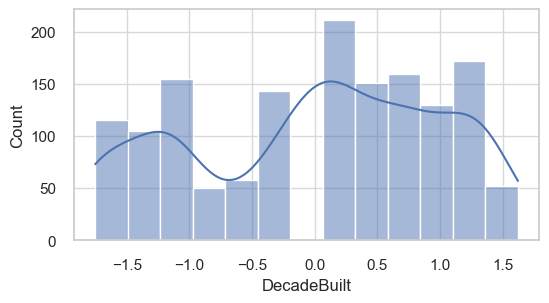

In [1677]:
plt.figure(figsize=(6, 3))
sns.histplot(transformed_scaled_ord['DecadeBuilt'], kde=True)
plt.show()

**Log Transformed + Scaled**

Let's try the log transformed + scaled alternative

In [1678]:
ordinal_pipeline_log_scale = Pipeline([
    ('ordinal_encoder', OrdinalEncoder()),
    ('log_transformer', FunctionTransformer(np.log1p)),
    ('scalar', StandardScaler())
])

ordinal_transformer_log_scaled = ColumnTransformer(
    transformers=[('ordinal_log_scaled', ordinal_pipeline_log_scale, ['DecadeBuilt'])],
    remainder='passthrough',
    verbose_feature_names_out=False)

ordinal_transformer_log_scaled.set_output(transform="pandas")

With transform="pandas", `func` should return a DataFrame to follow the set_output API.


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_log_scaled',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder()),
                                                 ('log_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scalar', StandardScaler())]),
                                 ['DecadeBuilt'])],
                  verbose_feature_names_out=False)

In [1679]:
transformed_log_scaled_ord = ordinal_transformer_log_scaled.fit_transform(X)
transformed_log_scaled_ord.head()

DecadeBuilt Neighborhood  NumberofBuildings  NumberofFloors  \
0      -0.8823     DOWNTOWN             1.0000              12   
1       0.8352     DOWNTOWN             1.0000              11   
2       0.3264     DOWNTOWN             1.0000              41   
3      -0.8823     DOWNTOWN             1.0000              10   
4       0.6849     DOWNTOWN             1.0000              18   

   PropertyGFATotal  PropertyParking(pct)  SteamUse(pct)  Electricity(pct)  \
0             88434                0.0000        27.0000           53.0000   
1            103566               15.0000         0.0000           37.0000   
2            956110               21.0000        13.0000           75.0000   
3             61320                0.0000        32.0000           40.0000   
4            175580               35.0000         0.0000           37.0000   

   NaturalGas(pct)  Type_Accommodation  Type_Entertainment  Type_Industry  \
0          17.0000            100.0000              0.0000         0.0000   
1          59.0000             81.0000              4.0000         0.0000   
2           2.0000             79.0000              0.0000         0.0000   
3          26.0000            100.0000              0.0000         0.0000   
4          60.0000             70.0000              0.0000         0.0000   

   Type_Medical_facility  Type_Office  Type_Other  Type_Parking  Type_School  \
0                 0.0000       0.0000      0.0000        0.0000       0.0000   
1                 0.0000       0.0000      0.0000       15.0000       0.0000   
2                 0.0000       0.0000      0.0000        0.0000       0.0000   
3                 0.0000       0.0000      0.0000        0.0000       0.0000   
4                 0.0000       0.0000      0.0000       39.0000       0.0000   

   Type_Services  Type_Storage_facility  Type_Store  
0         0.0000                 0.0000      0.0000  
1         0.0000                 0.0000      0.0000  
2         0.0000                 0.0000      0.0000  
3         0.0000                 0.0000      0.0000  
4         0.0000                 0.0000      0.0000

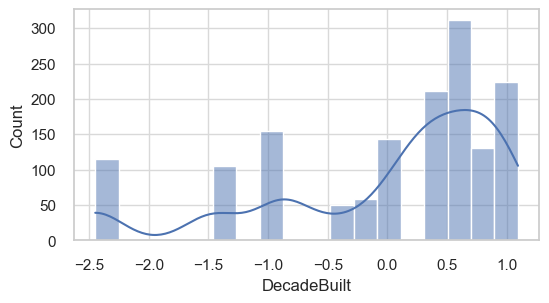

In [1680]:
plt.figure(figsize=(6, 3))
sns.histplot(transformed_log_scaled_ord['DecadeBuilt'], kde=True)
plt.show()

**With QuantileTransformer**

In [1681]:
ordinal_pipeline_qtrans = Pipeline([
    ('Ordinal encoder', OrdinalEncoder()),
    ('quantile_transformer', QuantileTransformer(output_distribution="normal"))
])

ordinal_transformer_qtrans = ColumnTransformer(
    transformers=[('ordinal_qtransformed', ordinal_pipeline_qtrans, ['DecadeBuilt'])],
    remainder='passthrough',
    verbose_feature_names_out=False)

ordinal_transformer_qtrans.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_qtransformed',
                                 Pipeline(steps=[('Ordinal encoder',
                                                  OrdinalEncoder()),
                                                 ('quantile_transformer',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 ['DecadeBuilt'])],
                  verbose_feature_names_out=False)

In [1682]:
transformed_qtrans = ordinal_transformer_qtrans.fit_transform(X)
transformed_qtrans.head()

DecadeBuilt Neighborhood  NumberofBuildings  NumberofFloors  \
0      -0.8499     DOWNTOWN             1.0000              12   
1       0.8698     DOWNTOWN             1.0000              11   
2      -0.0326     DOWNTOWN             1.0000              41   
3      -0.8499     DOWNTOWN             1.0000              10   
4       0.5569     DOWNTOWN             1.0000              18   

   PropertyGFATotal  PropertyParking(pct)  SteamUse(pct)  Electricity(pct)  \
0             88434                0.0000        27.0000           53.0000   
1            103566               15.0000         0.0000           37.0000   
2            956110               21.0000        13.0000           75.0000   
3             61320                0.0000        32.0000           40.0000   
4            175580               35.0000         0.0000           37.0000   

   NaturalGas(pct)  Type_Accommodation  Type_Entertainment  Type_Industry  \
0          17.0000            100.0000              0.0000         0.0000   
1          59.0000             81.0000              4.0000         0.0000   
2           2.0000             79.0000              0.0000         0.0000   
3          26.0000            100.0000              0.0000         0.0000   
4          60.0000             70.0000              0.0000         0.0000   

   Type_Medical_facility  Type_Office  Type_Other  Type_Parking  Type_School  \
0                 0.0000       0.0000      0.0000        0.0000       0.0000   
1                 0.0000       0.0000      0.0000       15.0000       0.0000   
2                 0.0000       0.0000      0.0000        0.0000       0.0000   
3                 0.0000       0.0000      0.0000        0.0000       0.0000   
4                 0.0000       0.0000      0.0000       39.0000       0.0000   

   Type_Services  Type_Storage_facility  Type_Store  
0         0.0000                 0.0000      0.0000  
1         0.0000                 0.0000      0.0000  
2         0.0000                 0.0000      0.0000  
3         0.0000                 0.0000      0.0000  
4         0.0000                 0.0000      0.0000

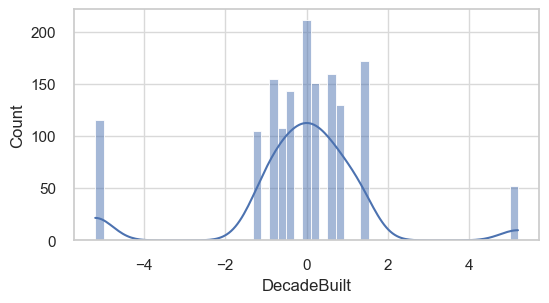

In [1683]:
plt.figure(figsize=(6, 3))
sns.histplot(transformed_qtrans['DecadeBuilt'], kde=True)
plt.show()

### OneHotEncoder

We can use OneHotEncoder for the `Neighborhood`

In [1684]:
ohe_transformer = ColumnTransformer(
    transformers=[('one_hot_encoder', OneHotEncoder(sparse_output=False), ['Neighborhood'])],
    remainder='passthrough',
    verbose_feature_names_out=False)

ohe_transformer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Neighborhood'])],
                  verbose_feature_names_out=False)

In [1685]:
transformed_ohe = ohe_transformer.fit_transform(X)
transformed_ohe.sample(20)

Neighborhood_BALLARD  Neighborhood_CENTRAL  Neighborhood_DELRIDGE  \
1011                0.0000                0.0000                 0.0000   
20                  0.0000                0.0000                 0.0000   
69                  0.0000                0.0000                 0.0000   
410                 0.0000                0.0000                 0.0000   
904                 0.0000                0.0000                 0.0000   
665                 0.0000                0.0000                 0.0000   
1148                0.0000                1.0000                 0.0000   
732                 0.0000                0.0000                 0.0000   
1472                0.0000                0.0000                 0.0000   
581                 0.0000                0.0000                 0.0000   
271                 0.0000                0.0000                 0.0000   
509                 0.0000                0.0000                 0.0000   
1320                0.0000                1.0000                 0.0000   
1456                0.0000                0.0000                 0.0000   
1106                0.0000                0.0000                 0.0000   
865                 0.0000                0.0000                 0.0000   
1023                0.0000                0.0000                 0.0000   
1169                0.0000                0.0000                 0.0000   
1085                0.0000                1.0000                 0.0000   
666                 0.0000                0.0000                 0.0000   

      Neighborhood_DOWNTOWN  Neighborhood_EAST  Neighborhood_GREATER DUWAMISH  \
1011                 0.0000             0.0000                         1.0000   
20                   1.0000             0.0000                         0.0000   
69                   0.0000             0.0000                         0.0000   
410                  0.0000             1.0000                         0.0000   
904                  0.0000             0.0000                         0.0000   
665                  0.0000             0.0000                         0.0000   
1148                 0.0000             0.0000                         0.0000   
732                  0.0000             1.0000                         0.0000   
1472                 0.0000             0.0000                         0.0000   
581                  1.0000             0.0000                         0.0000   
271                  0.0000             0.0000                         0.0000   
509                  0.0000             0.0000                         1.0000   
1320                 0.0000             0.0000                         0.0000   
1456                 0.0000             0.0000                         1.0000   
1106                 0.0000             0.0000                         1.0000   
865                  0.0000             0.0000                         0.0000   
1023                 0.0000             0.0000                         1.0000   
1169                 0.0000             0.0000                         1.0000   
1085                 0.0000             0.0000                         0.0000   
666                  0.0000             0.0000                         0.0000   

      Neighborhood_LAKE UNION  Neighborhood_MAGNOLIA / QUEEN ANNE  \
1011                   0.0000                              0.0000   
20                     0.0000                              0.0000   
69                     0.0000                              1.0000   
410                    0.0000                              0.0000   
904                    0.0000                              1.0000   
665                    0.0000                              0.0000   
1148                   0.0000                              0.0000   
732                    0.0000                              0.0000   
1472                   0.0000                              0.0000   
581                    0.0000         

In [1686]:
transformed_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Neighborhood_BALLARD                1502 non-null   float64
 1   Neighborhood_CENTRAL                1502 non-null   float64
 2   Neighborhood_DELRIDGE               1502 non-null   float64
 3   Neighborhood_DOWNTOWN               1502 non-null   float64
 4   Neighborhood_EAST                   1502 non-null   float64
 5   Neighborhood_GREATER DUWAMISH       1502 non-null   float64
 6   Neighborhood_LAKE UNION             1502 non-null   float64
 7   Neighborhood_MAGNOLIA / QUEEN ANNE  1502 non-null   float64
 8   Neighborhood_NORTH                  1502 non-null   float64
 9   Neighborhood_NORTHEAST              1502 non-null   float64
 10  Neighborhood_NORTHWEST              1502 non-null   float64
 11  Neighborhood_SOUTHEAST              1502 no

### Log Transformer + Standard Scalar

For the numeric features, we will test and check distributions for: <br/>
- StandardScalar
- Log Transformation + StandardScalar
- QuantileTransformer

In [1687]:
def display_distribution(df):
    fig = plt.figure(figsize=(24, 28))
    
    for index, feature in enumerate (numerical_features):
        ax = fig.add_subplot(8,3, (index+1))
        ax.hist(df[feature], density=True, color = 'steelblue', edgecolor='none', bins=20)
        ax.set_title(feature, fontsize=14)

In [1688]:
log_scale_pipeline = Pipeline([
    ('log_transformer', FunctionTransformer(np.log1p)),
    ('standard_scaler', StandardScaler())]) 

log_scale_transformer = ColumnTransformer(
    transformers=[
        ('log_scale', log_scale_pipeline, numerical_features),
    ],
    verbose_feature_names_out=False, 
    remainder='passthrough'
)

log_scale_transformer.set_output(transform="pandas")

With transform="pandas", `func` should return a DataFrame to follow the set_output API.


ColumnTransformer(remainder='passthrough',
                  transformers=[('log_scale',
                                 Pipeline(steps=[('log_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyParking(pct)', 'SteamUse(pct)', 'Electricity(pct)',
       'NaturalGas(pct)', 'Type_Accommodation', 'Type_Entertainment',
       'Type_Industry', 'Type_Medical_facility', 'Type_Office', 'Type_Other',
       'Type_Parking', 'Type_School', 'Type_Services', 'Type_Storage_facility',
       'Type_Store'],
      dtype='object'))],
                  verbose_feature_names_out=False)

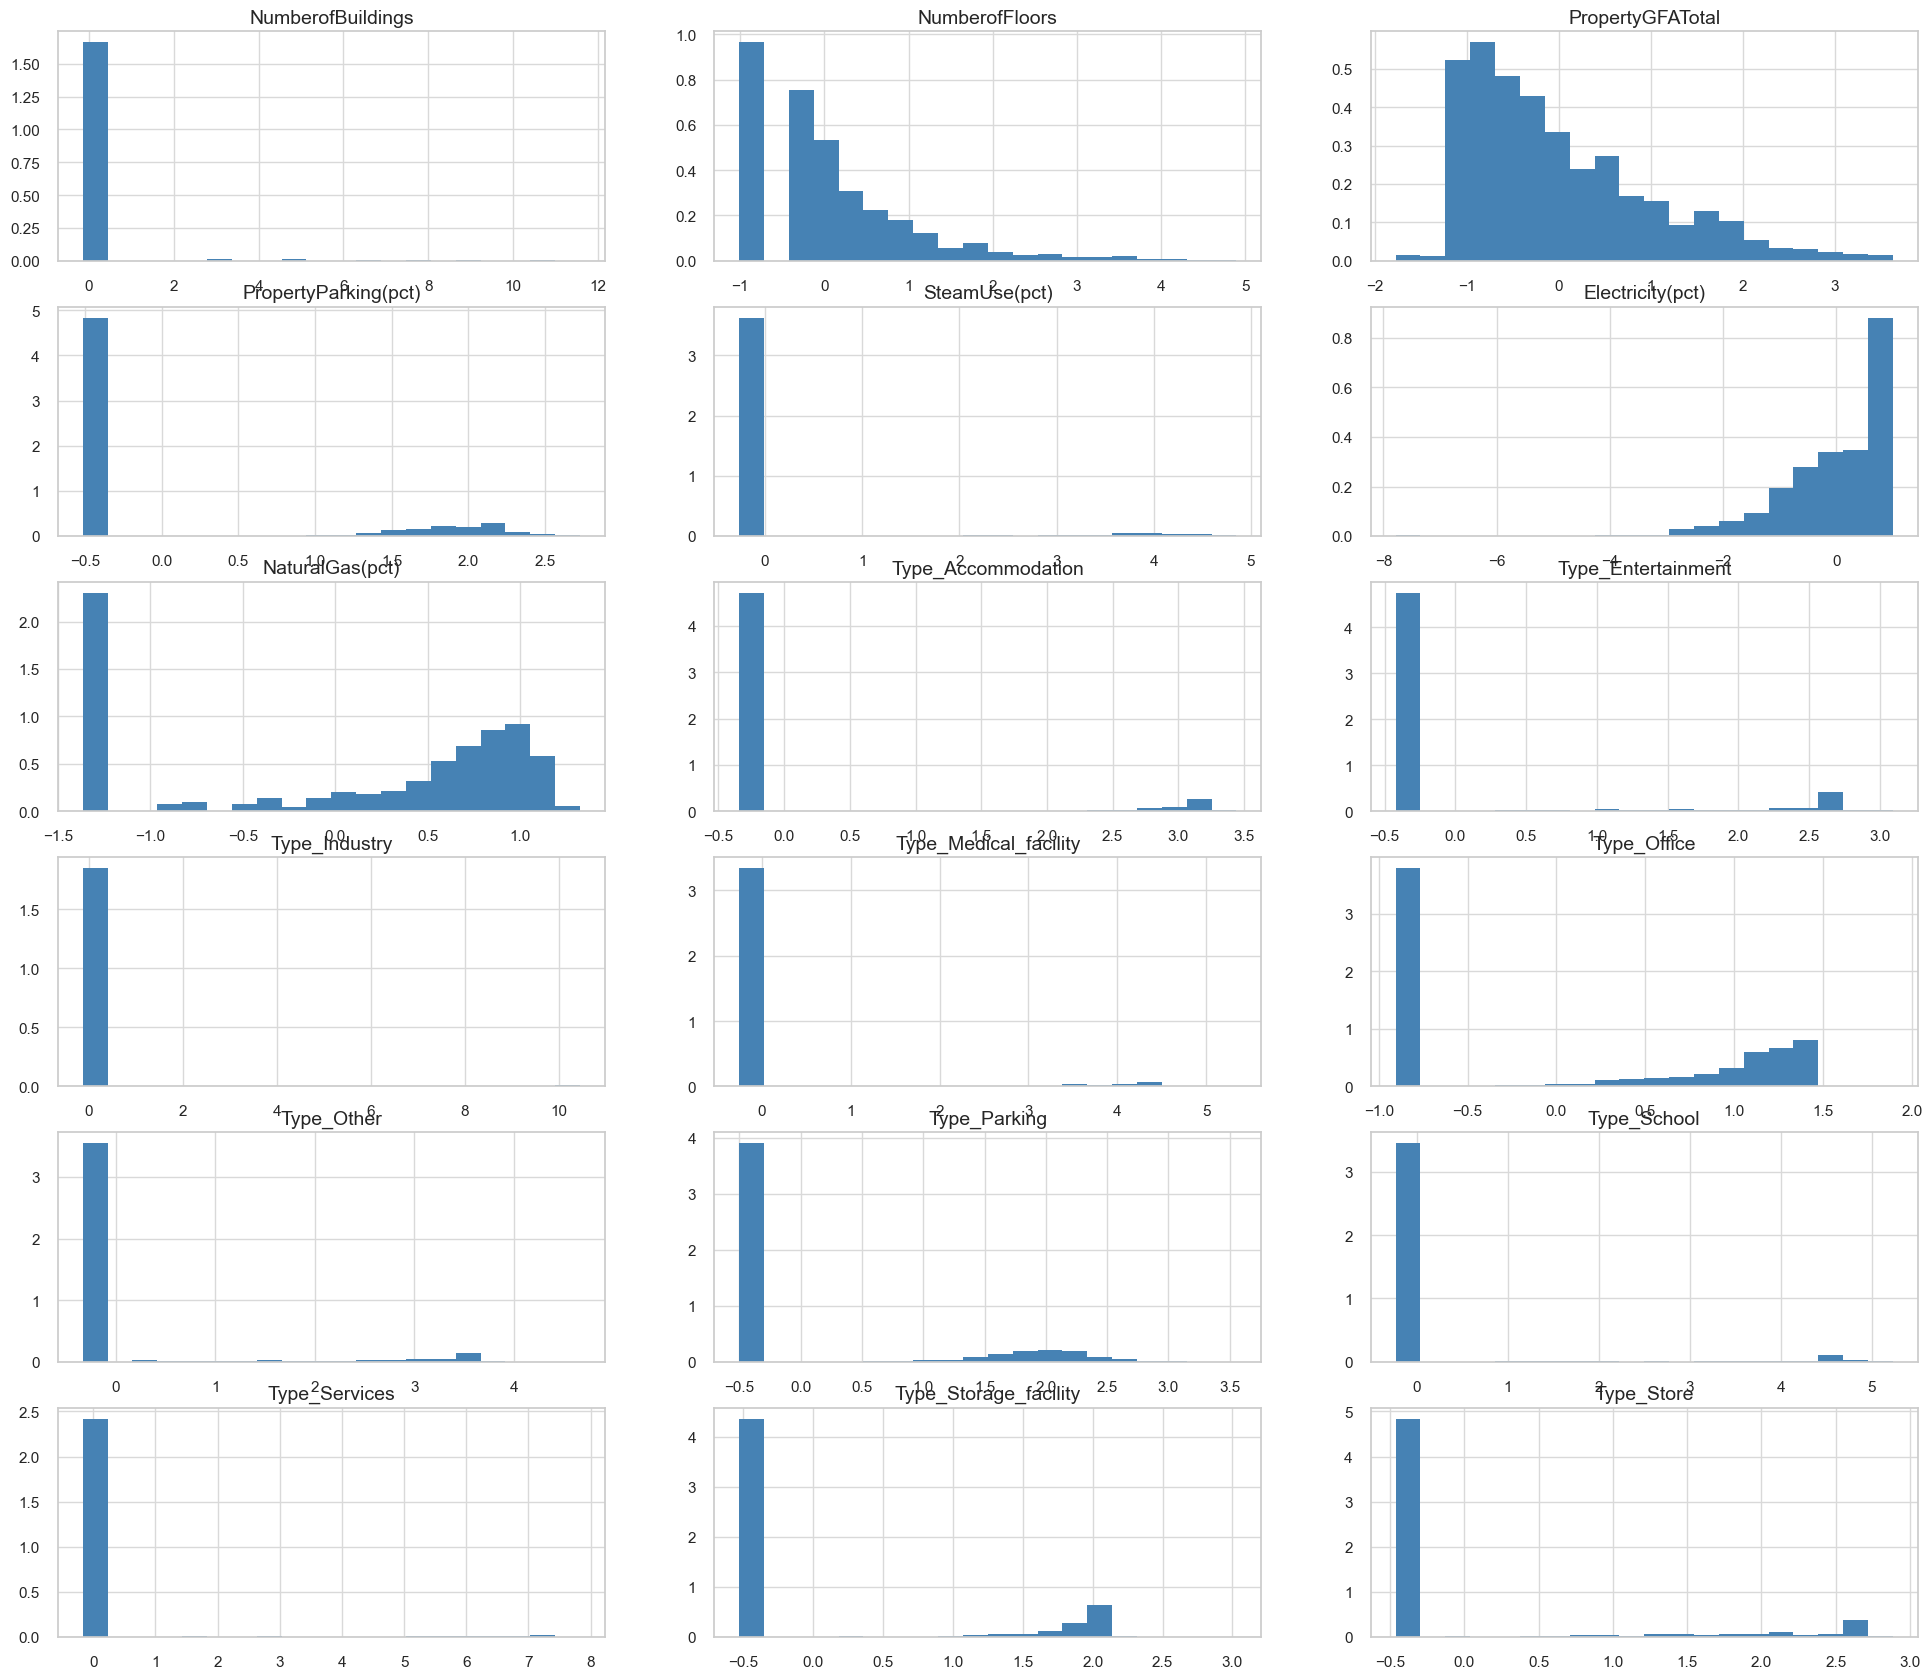

In [1689]:
log_scaled = log_scale_transformer.fit_transform(X)

display_distribution(log_scaled)

### QuantileTransformer

In [1690]:
quantile_transformer = ColumnTransformer(transformers=[
        ('quantile_transformer', QuantileTransformer(output_distribution="normal"), numerical_features),
    ],
    verbose_feature_names_out=False,
    remainder='passthrough')

quantile_transformer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('quantile_transformer',
                                 QuantileTransformer(output_distribution='normal'),
                                 Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyParking(pct)', 'SteamUse(pct)', 'Electricity(pct)',
       'NaturalGas(pct)', 'Type_Accommodation', 'Type_Entertainment',
       'Type_Industry', 'Type_Medical_facility', 'Type_Office', 'Type_Other',
       'Type_Parking', 'Type_School', 'Type_Services', 'Type_Storage_facility',
       'Type_Store'],
      dtype='object'))],
                  verbose_feature_names_out=False)

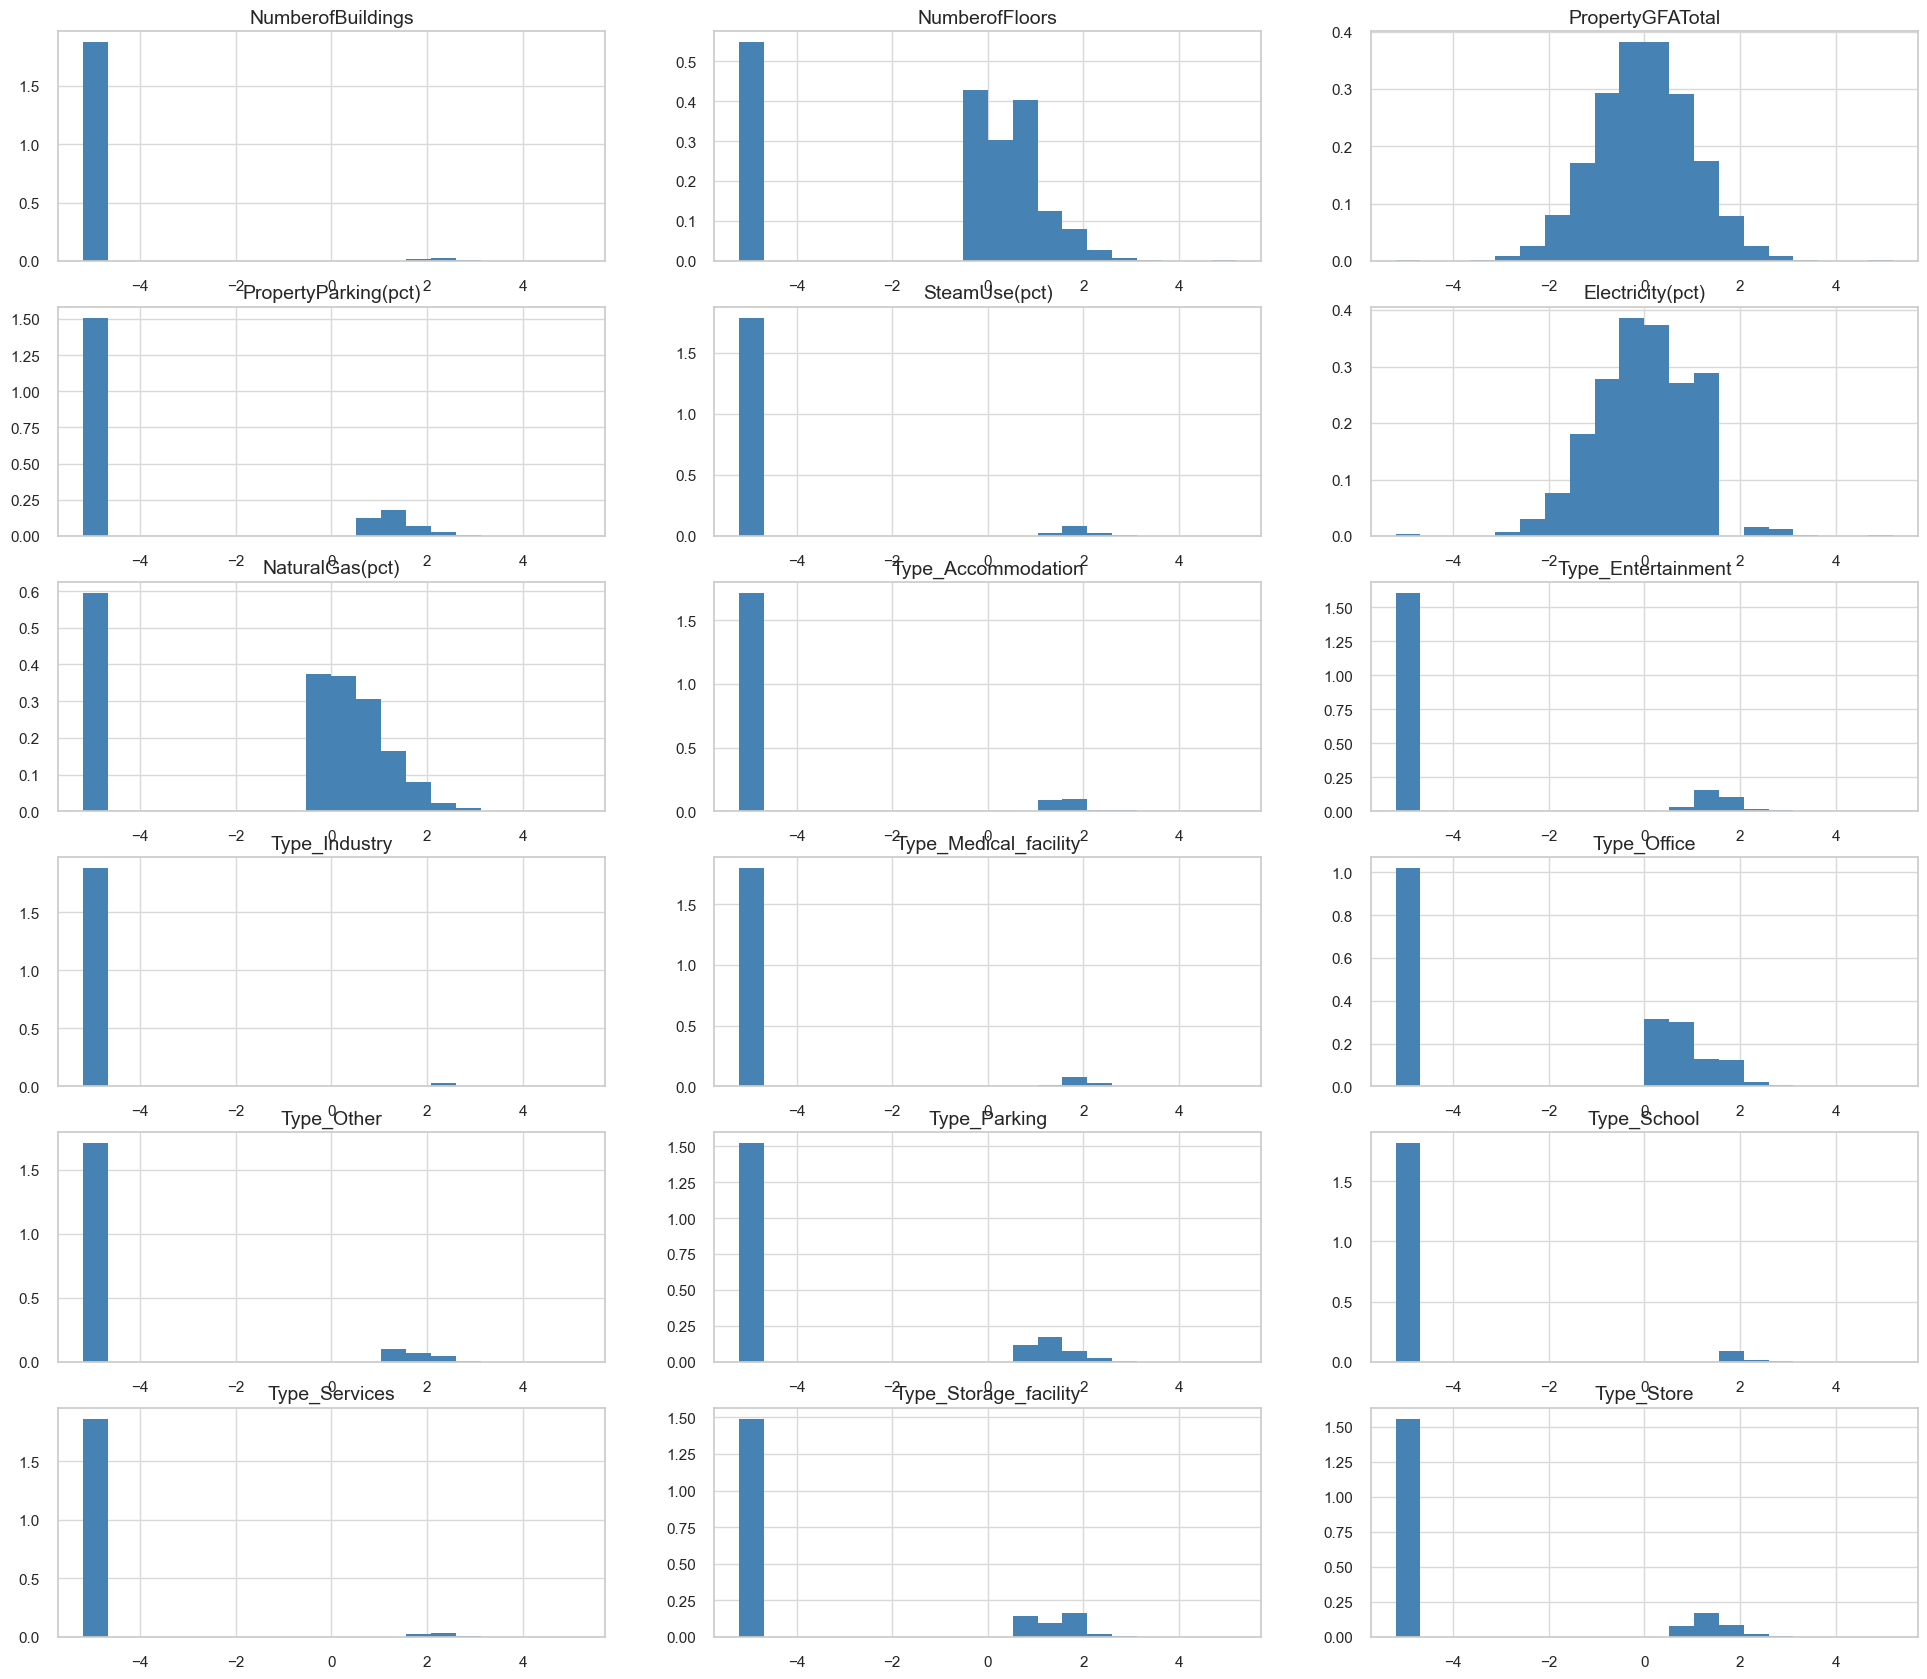

In [1691]:
quantile_transformed = quantile_transformer.fit_transform(X)

display_distribution(quantile_transformed)

### Final preprocessors

Define 3 preprocessors to use in the Pipelines.

With QuantileTransformer

In [1692]:
qtrans_preprocessor = ColumnTransformer(transformers=[
    ('ordinal_qtransformed', ordinal_pipeline_qtrans, ['DecadeBuilt']),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False), ['Neighborhood']),
    ('quantile_transformer', QuantileTransformer(output_distribution="normal"), numerical_features)
], verbose_feature_names_out=False,
    remainder='passthrough')

qtrans_preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_qtransformed',
                                 Pipeline(steps=[('Ordinal encoder',
                                                  OrdinalEncoder()),
                                                 ('quantile_transformer',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 ['DecadeBuilt']),
                                ('one_hot_encoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Neighborhood']),
                                ('quantile_transformer',
                                 QuantileTransformer(output_d...
                                 Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyParking(pct)', 'SteamUse(pct)', 'Electricity(pct)',
       'NaturalGas(pct)', 'Type_Accommodation', 'Type_Entertainment',
       'Type_Industry', 'Type_Medical_facility', 'Type_Office', 'Type_Other',
       'Type_Parking', 'Type_School', 'Type_Services', 'Type_Storage_facility',
       'Type_Store'],
      dtype='object'))],
                  verbose_feature_names_out=False)

With log + scaled preprocessing

In [1693]:
log_scaled_preprocessor = ColumnTransformer(transformers=[
    ('ordinal_log_scale', ordinal_pipeline_log_scale, ['DecadeBuilt']),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False), ['Neighborhood']),
    ('numerical_log_scale', log_scale_pipeline, numerical_features)
], verbose_feature_names_out=False,
    remainder='passthrough')

log_scaled_preprocessor.set_output(transform="pandas")

With transform="pandas", `func` should return a DataFrame to follow the set_output API.


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_log_scale',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder()),
                                                 ('log_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scalar', StandardScaler())]),
                                 ['DecadeBuilt']),
                                ('one_hot_encoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Neighborhood']),
                                ('numerical_log_scale',
                                 Pipeline(steps=[(...
                                 Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyParking(pct)', 'SteamUse(pct)', 'Electricity(pct)',
       'NaturalGas(pct)', 'Type_Accommodation', 'Type_Entertainment',
       'Type_Industry', 'Type_Medical_facility', 'Type_Office', 'Type_Other',
       'Type_Parking', 'Type_School', 'Type_Services', 'Type_Storage_facility',
       'Type_Store'],
      dtype='object'))],
                  verbose_feature_names_out=False)

With StandardScalar only

In [1694]:
scaled_preprocessor = ColumnTransformer(transformers=[
    ('ordinal_scale', ordinal_pipeline, ['DecadeBuilt']),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False), ['Neighborhood']),
    ('numerical_scale', StandardScaler(), numerical_features)
], verbose_feature_names_out=False,
    remainder='passthrough')

scaled_preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_scale',
                                 Pipeline(steps=[('Ordinal encoder',
                                                  OrdinalEncoder()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['DecadeBuilt']),
                                ('one_hot_encoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Neighborhood']),
                                ('numerical_scale', StandardScaler(),
                                 Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyParking(pct)', 'SteamUse(pct)', 'Electricity(pct)',
       'NaturalGas(pct)', 'Type_Accommodation', 'Type_Entertainment',
       'Type_Industry', 'Type_Medical_facility', 'Type_Office', 'Type_Other',
       'Type_Parking', 'Type_School', 'Type_Services', 'Type_Storage_facility',
       'Type_Store'],
      dtype='object'))],
                  verbose_feature_names_out=False)

# Modelisation

Define functions to display score and errors

In [1695]:
def get_errors(y_test, y_predict):
    '''Get the main errors in a dictionary'''
    
    return {
        'R2': round(r2_score(y_test, y_predict), 4),
        'MSE': round(mean_squared_error(y_test, y_predict), 2),
        'RMSE': round(mean_squared_error(y_test, y_predict, squared=False), 2),
        'MedAE': round(median_absolute_error(y_test, y_predict), 2)
    }

In [1696]:
def display_scores(y_test, y_predict, model_name):
    '''Displays r2_score, RMSE, MAE for the given model'''

    print(model_name)
    print('---------------------')
    
    errors = get_errors(y_test, y_predict)
    
    for error_name in errors:
        print(f'{error_name}: {errors[error_name]}')

## Dummy Regressors

Train and compare the results of the following dummy regressors:
- DummyRegressor with the 'mean' parameter
- DummyRegressor with the 'median' parameter

(not using Pipeline here because the features will not be used)

In [1697]:
dummy_regressor_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)
dummy_regressor_median = DummyRegressor(strategy='median').fit(
    X_train, y_train)

In [1698]:
y_predict_dummy_mean = dummy_regressor_mean.predict(X_test)
y_predict_dummy_median = dummy_regressor_median.predict(X_test)

In [1699]:
display_scores(y_test, y_predict_dummy_mean, 'Dummy Regressor Mean')

print('')

display_scores(y_test, y_predict_dummy_median, 'Dummy Regressor Median')

Dummy Regressor Mean
---------------------
R2: -0.0005
MSE: 79309.2
RMSE: 281.62
MedAE: 109.78

Dummy Regressor Median
---------------------
R2: -0.1166
MSE: 88514.94
RMSE: 297.51
MedAE: 37.17


The scores are really poor with both mean and median substitution, it does not make sense to use these values as baseline. 

## Linear Regression

Let's take the Linear Regression model as the baseline and try different preprocessors. <br/>

Linear Regression with Quantile Transformed numeric features

In [1700]:
lr_pipeline_qtrans = Pipeline(steps=[
    ('pre_processing', qtrans_preprocessor),
    ('linear_regression', LinearRegression())
])

lr_pipeline_qtrans.fit(X_train, y_train)

y_pred_lr_qtrans = lr_pipeline_qtrans.predict(X_test)

display_scores(y_test, y_pred_lr_qtrans, 'Linear Regression')

Linear Regression
---------------------
R2: 0.3903
MSE: 48329.1
RMSE: 219.84
MedAE: 81.56


In [1701]:
train_score_lr = lr_pipeline_qtrans.score(X_train, y_train)
test_score_lr = lr_pipeline_qtrans.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.46190693367697744
The test score for lr model is 0.3903450487771043


Linear Regression with StandardScalar only

In [1702]:
lr_pipeline_scaled = Pipeline(steps=[
    ('pre_processing', scaled_preprocessor),
    ('linear_regression', LinearRegression())
])

fit_time_before = time.time()
lr_pipeline_scaled.fit(X_train, y_train)
fit_time = round((time.time() - fit_time_before), 4)
print(f'fit time: {fit_time} seconds')


predict_time_before = time.time()
y_pred_lr_scaled = lr_pipeline_scaled.predict(X_test)
predict_time = round((time.time() - predict_time_before), 4)
print(f'predict time: {predict_time} seconds \n')

display_scores(y_test, y_pred_lr_scaled, 'Linear Regression scaled')

fit time: 0.0201 seconds
predict time: 0.0062 seconds 

Linear Regression scaled
---------------------
R2: 0.4358
MSE: 44727.7
RMSE: 211.49
MedAE: 58.2


Linear Regression with log transformed + standard scaled numeric features

In [1703]:
lr_pipeline_log_scaled = Pipeline(steps=[
    ('pre_processing', log_scaled_preprocessor),
    ('linear_regression', LinearRegression())
])

fit_time_before = time.time()
lr_pipeline_log_scaled.fit(X_train, y_train)
fit_time = round((time.time() - fit_time_before), 4)
print(f'fit time: {fit_time} seconds')

predict_time_before = time.time()
y_pred_lr_log_scaled = lr_pipeline_log_scaled.predict(X_test)
print(f'predict time: {predict_time} seconds \n')

display_scores(y_test, y_pred_lr_log_scaled, 'Linear Regression Log + scaled')

fit time: 0.0234 seconds
predict time: 0.0062 seconds 

Linear Regression Log + scaled
---------------------
R2: 0.477
MSE: 41461.07
RMSE: 203.62
MedAE: 74.6


The R2 score is higher and MSE is lower with the data processed by log transformation + standard scalar, we'll set it as baseline

In [1705]:
train_score_lr2 = lr_pipeline_log_scaled.score(X_train, y_train)
test_score_lr2 = lr_pipeline_log_scaled.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr2))
print("The test score for lr model is {}".format(test_score_lr2))

The train score for lr model is 0.5357705513228013
The test score for lr model is 0.47698284284817694


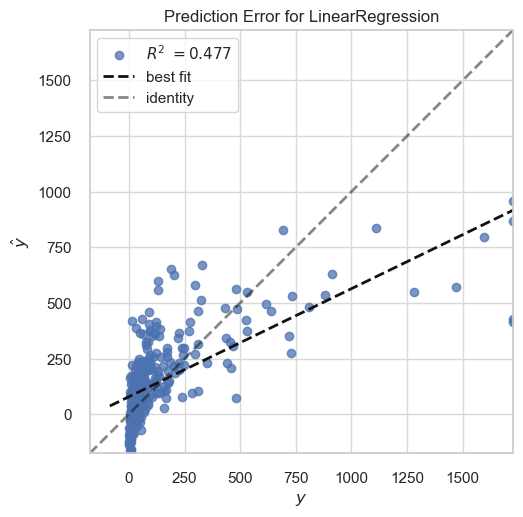

In [1706]:
visualizer_lr = prediction_error(lr_pipeline_log_scaled, X_train, y_train, X_test, y_test, is_fitted=True)

Let's use the residuals plot to analyze the variance of the error of the linear regressor. 

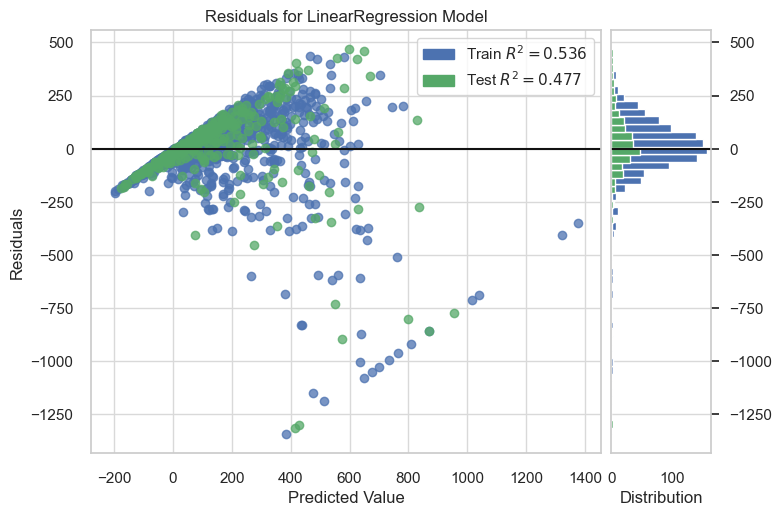

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1707]:
res_plot_lr = ResidualsPlot(lr_pipeline_log_scaled, is_fitted=True)

res_plot_lr.fit(X_train, y_train)  
res_plot_lr.score(X_test, y_test)
res_plot_lr.show()

In general, if the points are randomly dispersed around the horizontal axis, a regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In this example, we can't say that the points are randomly dispersed, so the regression models might not be the most efficient. On the other hand, the histogram shows that errors are normally distributed and it indicates a rather well fitted model. <br/>
The score on the train data is slightly higher than the score on the test data which means that it generalizes quite well the model.

Put the errors in a dataframe

In [1709]:
errors = {
    'Model': 'Linear Regression'
} | get_errors(y_test, y_pred_lr_log_scaled) | {
    'fit time': fit_time,
    'predict time': predict_time
}
errors

{'Model': 'Linear Regression',
 'R2': 0.477,
 'MSE': 41461.07,
 'RMSE': 203.62,
 'MedAE': 74.6,
 'fit time': 0.0234,
 'predict time': 0.0062}

In [1739]:
errors_df = pd.DataFrame([errors])
errors_df

Model     R2        MSE     RMSE   MedAE  fit time  \
0  Linear Regression 0.4770 41461.0700 203.6200 74.6000    0.0234   

   predict time  
0        0.0062

## Ridge Regression

In [1711]:
def display_cv_results(cv_results, param_alpha_label, best_alpha):
    '''Displays the results of GridSearchCV'''
    
    cv_results_df = pd.DataFrame(cv_results)

    print(cv_results_df[[
        param_alpha_label, 'mean_train_score', 'mean_test_score',
        'rank_test_score'
    ]])

    # plotting
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=cv_results[param_alpha_label],
                 y=cv_results_df['mean_train_score'],
                 label='train score')

    sns.lineplot(x=cv_results[param_alpha_label],
                 y=cv_results_df['mean_test_score'],
                 label='test score')

    plt.axvline(x=best_alpha, linestyle='--')

    plt.xlabel(param_alpha_label)
    plt.ylabel('Negative Mean Absolute Error')

    plt.show()

In [1712]:
# Estimator
ridge_pipeline = Pipeline(steps=[('pre_processing',
                                  log_scaled_preprocessor), ('ridge', Ridge())])

# GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge_pipeline,
                                 param_grid={
                                     'ridge__alpha': np.linspace(80, 100, 20),
                                     'ridge__random_state': [0]
                                 },
                                 scoring='r2',
                                 cv=10,
                                 return_train_score=True)

grid_search_ridge.fit(X_train, y_train)

print(grid_search_ridge.best_params_, '\n')
ridge_alpha = grid_search_ridge.best_params_['ridge__alpha']

{'ridge__alpha': 89.47368421052632, 'ridge__random_state': 0} 



   param_ridge__alpha  mean_train_score  mean_test_score  rank_test_score
0             80.0000            0.5316           0.4799               19
1             81.0526            0.5315           0.4799               17
2             82.1053            0.5314           0.4799               15
3             83.1579            0.5313           0.4799               13
4             84.2105            0.5313           0.4799               11
5             85.2632            0.5312           0.4799                9
6             86.3158            0.5311           0.4799                7
7             87.3684            0.5310           0.4799                5
8             88.4211            0.5309           0.4799                3
9             89.4737            0.5308           0.4799                1
10            90.5263            0.5307           0.4799                2
11            91.5789            0.5306           0.4799                4
12            92.6316            0.530

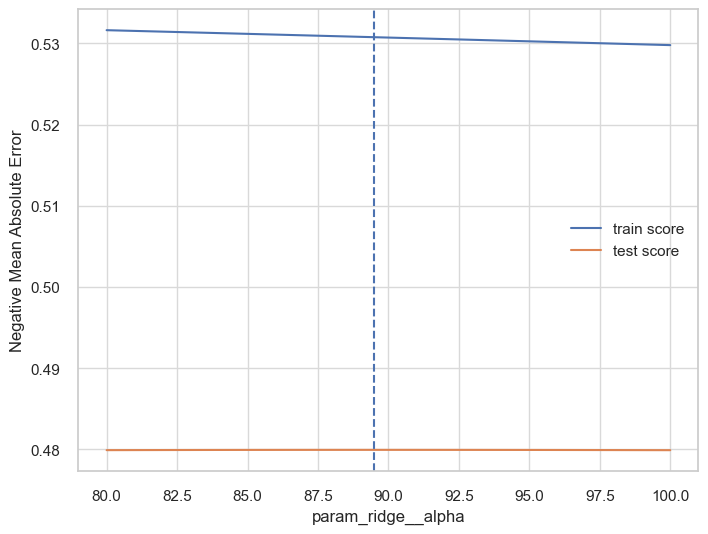

In [1713]:
display_cv_results(grid_search_ridge.cv_results_, 'param_ridge__alpha', ridge_alpha)

In [1714]:
ridge_pipeline_final = Pipeline(steps=[
    ('pre_processing', log_scaled_preprocessor), 
    ('ridge', Ridge(alpha=ridge_alpha, random_state=0))
])

fit_time_before = time.time()
ridge_pipeline_final.fit(X_train, y_train)
fit_time = round((time.time() - fit_time_before), 4)
print(f'fit time: {fit_time} seconds')

predict_time_before = time.time()
y_pred_ridge = ridge_pipeline_final.predict(X_test)
predict_time = round((time.time() - predict_time_before), 4)
print(f'predict time: {predict_time} seconds \n')

fit time: 0.0163 seconds
predict time: 0.0096 seconds 



In [1715]:
display_scores(y_test, y_pred_ridge, 'Ridge Regression')

Ridge Regression
---------------------
R2: 0.4796
MSE: 41250.02
RMSE: 203.1
MedAE: 69.07


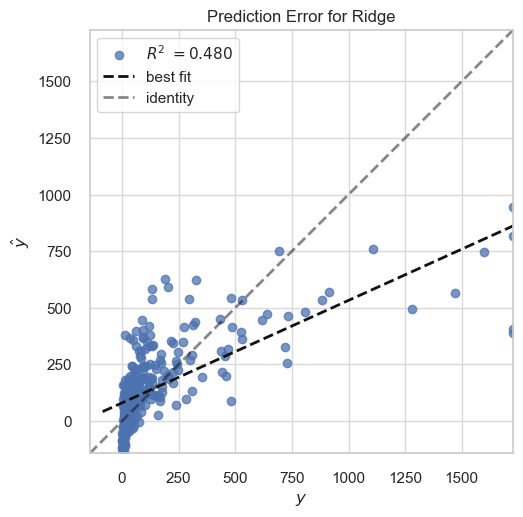

In [1716]:
visualizer_ridge = prediction_error(ridge_pipeline_final, X_train, y_train, X_test, y_test, is_fitted=True)

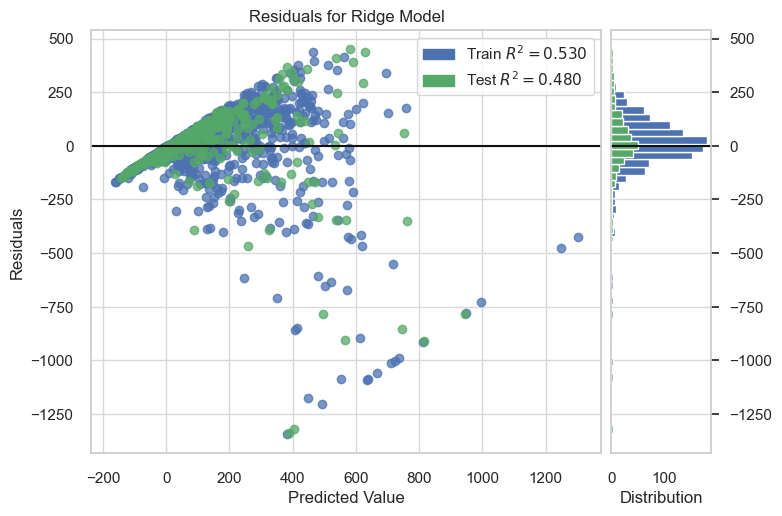

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1717]:
res_plot_ridge = ResidualsPlot(ridge_pipeline_final, is_fitted=True)

res_plot_ridge.fit(X_train, y_train)  
res_plot_ridge.score(X_test, y_test)
res_plot_ridge.show() 

After fine-tuning the model, the best score obtained is 0.4796 which slightly better than linear regression without regularization.

In [1740]:
errors_df.loc[len(errors_df)] = {
    'Model': 'Ridge Regression'
} | get_errors(y_test, y_pred_ridge) | {
    'fit time': fit_time,
    'predict time': predict_time
}
errors_df

Model     R2        MSE     RMSE   MedAE  fit time  \
0  Linear Regression 0.4770 41461.0700 203.6200 74.6000    0.0234   
1   Ridge Regression 0.4796 41250.0200 203.1000 69.0700    0.0201   

   predict time  
0        0.0062  
1        0.0092

## Lasso

In [1718]:
# Estimator
lasso_pipeline = Pipeline(steps=[('pre_processing',
                                  log_scaled_preprocessor), ('lasso', Lasso())])

# GridSearchCV
grid_search_lasso = GridSearchCV(estimator=lasso_pipeline,
                                 param_grid={
                                     'lasso__alpha': np.linspace(2, 4, 10),
                                     'lasso__random_state': [0]
                                 },
                                 scoring='r2',
                                 cv=10,
                                 return_train_score=True)

grid_search_lasso.fit(X_train, y_train)

print(grid_search_lasso.best_params_, '\n')
lasso_alpha = grid_search_lasso.best_params_['lasso__alpha']

{'lasso__alpha': 3.333333333333333, 'lasso__random_state': 0} 



  param_lasso__alpha  mean_train_score  mean_test_score  rank_test_score
0             2.0000            0.5304           0.4784               10
1             2.2222            0.5299           0.4785                9
2             2.4444            0.5294           0.4785                7
3             2.6667            0.5289           0.4785                8
4             2.8889            0.5285           0.4786                5
5             3.1111            0.5281           0.4787                3
6             3.3333            0.5277           0.4787                1
7             3.5556            0.5273           0.4787                2
8             3.7778            0.5269           0.4787                4
9             4.0000            0.5265           0.4786                6


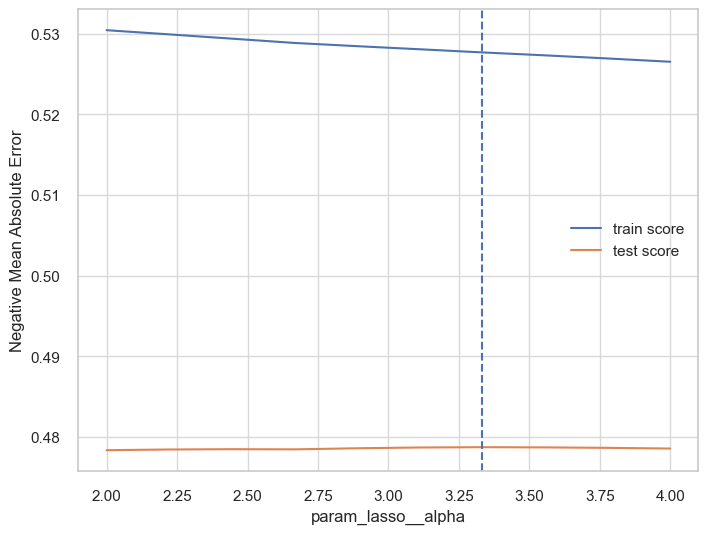

In [1719]:
display_cv_results(grid_search_lasso.cv_results_, 'param_lasso__alpha', lasso_alpha)

In [1720]:
lasso_pipeline_final = Pipeline(steps=[
    ('pre_processing', log_scaled_preprocessor), 
    ('lasso', Lasso(alpha=lasso_alpha, random_state=0))
])

fit_time_before = time.time()
lasso_pipeline_final.fit(X_train, y_train)
fit_time = round((time.time() - fit_time_before), 4)
print(f'fit time: {fit_time} seconds')

predict_time_before = time.time()
y_pred_lasso = lasso_pipeline_final.predict(X_test)
predict_time = round((time.time() - predict_time_before), 4)
print(f'predict time: {predict_time} seconds \n')

fit time: 0.0218 seconds
predict time: 0.0085 seconds 



In [1721]:
display_scores(y_test, y_pred_lasso, 'Lasso Regression')

Lasso Regression
---------------------
R2: 0.4723
MSE: 41833.56
RMSE: 204.53
MedAE: 64.91


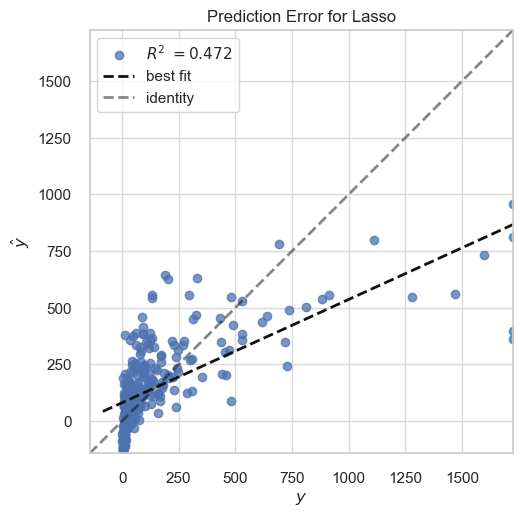

In [1722]:
visualizer_lasso = prediction_error(lasso_pipeline_final, X_train, y_train, X_test, y_test, is_fitted=True)

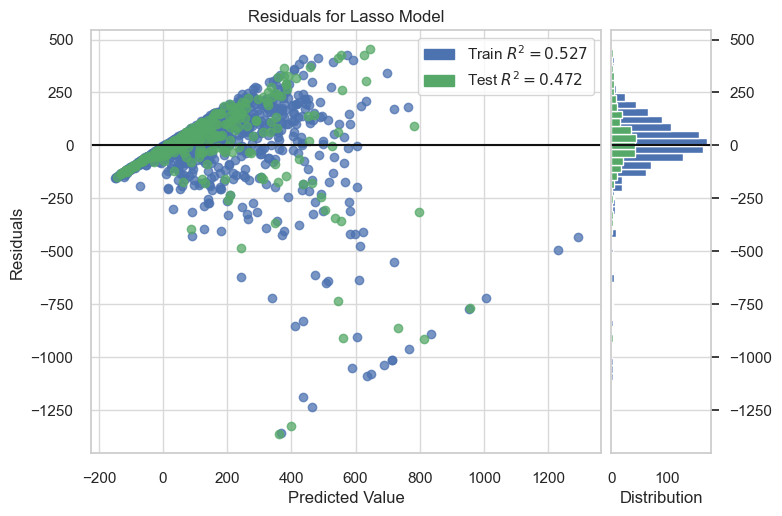

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1723]:
res_plot_lasso = ResidualsPlot(lasso_pipeline_final, is_fitted=True)

res_plot_lasso.fit(X_train, y_train)  
res_plot_lasso.score(X_test, y_test)
res_plot_lasso.show() 

Lasso gave a worse score than Linear Regression.

In [1741]:
errors_df.loc[len(errors_df)] = {
    'Model': 'Lasso'
} | get_errors(y_test, y_pred_lasso) | {
    'fit time': fit_time,
    'predict time': predict_time
}
errors_df

Model     R2        MSE     RMSE   MedAE  fit time  \
0  Linear Regression 0.4770 41461.0700 203.6200 74.6000    0.0234   
1   Ridge Regression 0.4796 41250.0200 203.1000 69.0700    0.0201   
2              Lasso 0.4723 41833.5600 204.5300 64.9100    0.0201   

   predict time  
0        0.0062  
1        0.0092  
2        0.0092

## ElasticNet

Elastic Net combines both Ridge Regression and Lasso, we could have used only Elastic Net instead of Ridge and Lasso and control one or another via the `l1_ratio` parameter.

In [1729]:
params_elastic = {
    'elastic__alpha': np.linspace(0.1, 1, 10),
    'elastic__l1_ratio': np.linspace(0, 1, 10),
    'elastic__random_state': [0]
}

params_elastic

{'elastic__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'elastic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 'elastic__random_state': [0]}

In [1730]:
# Estimator
elastic_pipeline = Pipeline(steps=[
    ('pre_processing', log_scaled_preprocessor), 
    ('elastic', ElasticNet())
])

# GridSearchCV
grid_search_elastic = GridSearchCV(estimator=elastic_pipeline,
                                 param_grid=params_elastic,
                                 scoring='r2',
                                 cv=10,
                                 return_train_score=True)

grid_search_elastic.fit(X_train, y_train)

print(grid_search_elastic.best_params_, '\n')

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+07, tolerance: 6.911e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+07, tolerance: 7.424e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+07, tolerance: 6.506e+03 Linear regression models with null weig

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.981e+07, tolerance: 7.086e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.035e+07, tolerance: 7.031e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.966e+07, tolerance: 6.744e+03 Linear regression models with null weig

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.151e+07, tolerance: 6.920e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.074e+07, tolerance: 6.839e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.242e+07, tolerance: 6.911e+03 Linear regression models with null weig

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.350e+07, tolerance: 6.911e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.463e+07, tolerance: 7.424e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.185e+07, tolerance: 6.506e+03 Linear regression models with null weig

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.270e+07, tolerance: 6.506e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.420e+07, tolerance: 7.086e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+07, tolerance: 7.031e+03 Linear regression models with null weig

{'elastic__alpha': 0.6, 'elastic__l1_ratio': 0.8888888888888888, 'elastic__random_state': 0} 



In [1731]:
elastic_alpha = grid_search_elastic.best_params_['elastic__alpha']
elastic_l1_ratio = grid_search_elastic.best_params_['elastic__l1_ratio']

   param_elastic__alpha  mean_train_score  mean_test_score  rank_test_score
0                0.1000            0.5290           0.4798               13
1                0.1000            0.5301           0.4799               10
2                0.1000            0.5312           0.4800                8
3                0.1000            0.5322           0.4799               12
4                0.1000            0.5333           0.4796               18
..                  ...               ...              ...              ...
95               1.0000            0.4864           0.4548               78
96               1.0000            0.4997           0.4646               68
97               1.0000            0.5129           0.4734               55
98               1.0000            0.5252           0.4793               20
99               1.0000            0.5347           0.4772               34

[100 rows x 4 columns]


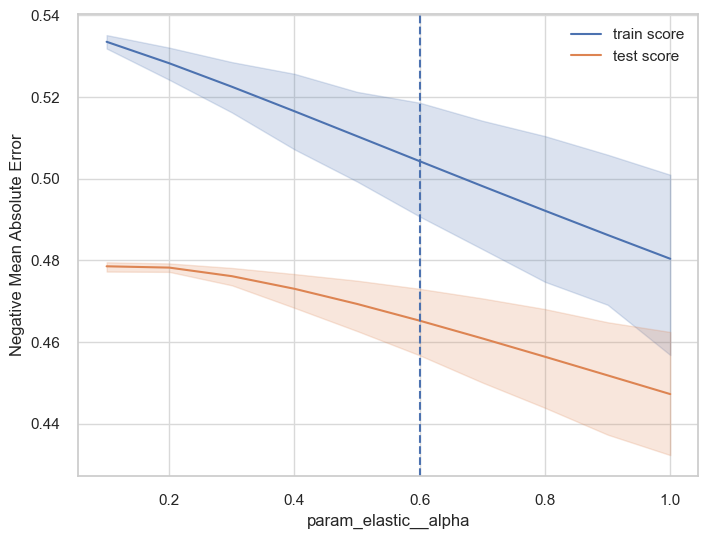

In [1732]:
display_cv_results(grid_search_elastic.cv_results_, 'param_elastic__alpha', elastic_alpha)

   param_elastic__l1_ratio  mean_train_score  mean_test_score  rank_test_score
0                   0.0000            0.5290           0.4798               13
1                   0.1111            0.5301           0.4799               10
2                   0.2222            0.5312           0.4800                8
3                   0.3333            0.5322           0.4799               12
4                   0.4444            0.5333           0.4796               18
..                     ...               ...              ...              ...
95                  0.5556            0.4864           0.4548               78
96                  0.6667            0.4997           0.4646               68
97                  0.7778            0.5129           0.4734               55
98                  0.8889            0.5252           0.4793               20
99                  1.0000            0.5347           0.4772               34

[100 rows x 4 columns]


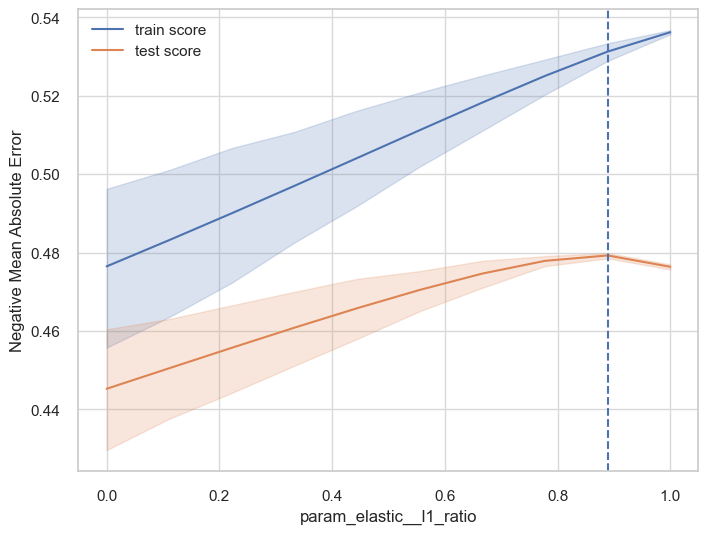

In [1733]:
display_cv_results(grid_search_elastic.cv_results_, 'param_elastic__l1_ratio', elastic_l1_ratio)

In [1734]:
elastic_pipeline_final = Pipeline(steps=[
    ('pre_processing', log_scaled_preprocessor), 
    ('elastic', ElasticNet(alpha=elastic_alpha, l1_ratio=elastic_l1_ratio, random_state=0))
])

fit_time_before = time.time()
elastic_pipeline_final.fit(X_train, y_train)
fit_time = round((time.time() - fit_time_before), 4)
print(f'fit time: {fit_time} seconds')

predict_time_before = time.time()
y_pred_elastic = elastic_pipeline_final.predict(X_test)
predict_time = round((time.time() - predict_time_before), 4)
print(f'predict time: {predict_time} seconds \n')

display_scores(y_test, y_pred_elastic, 'Elastic Net')

fit time: 0.0201 seconds
predict time: 0.0092 seconds 

Elastic Net
---------------------
R2: 0.4791
MSE: 41294.88
RMSE: 203.21
MedAE: 65.59


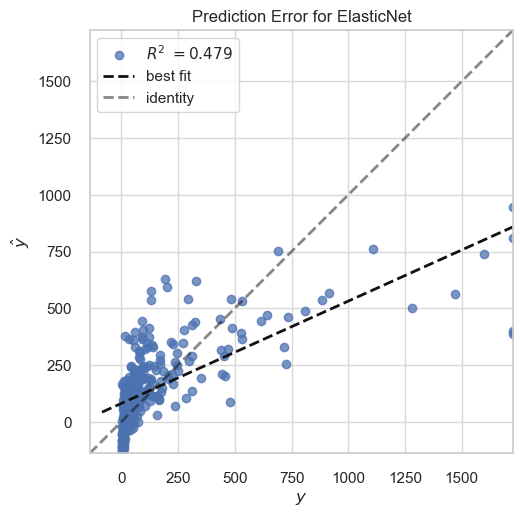

In [1735]:
visualizer_elastic = prediction_error(elastic_pipeline_final, X_train, y_train, X_test, y_test, is_fitted=True)

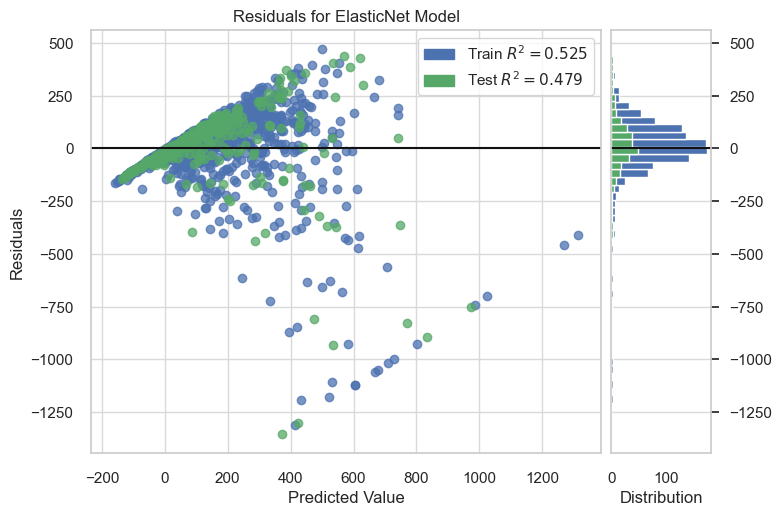

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1790]:
res_plot_elastic = ResidualsPlot(elastic_pipeline_final, is_fitted=True)

res_plot_elastic.fit(X_train, y_train)  
res_plot_elastic.score(X_test, y_test)
res_plot_elastic.show() 

The best `l1_ratio` value obtained is 0.9 which tends to the Lasso penalty, however the score is slighty better than the Lasso one.

In [1742]:
errors_df.loc[len(errors_df)] = {'Model': 'ElasticNet'} | get_errors(y_test, y_pred_elastic) | {
    'fit time': fit_time,
    'predict time': predict_time
}
errors_df

Model     R2        MSE     RMSE   MedAE  fit time  \
0  Linear Regression 0.4770 41461.0700 203.6200 74.6000    0.0234   
1   Ridge Regression 0.4796 41250.0200 203.1000 69.0700    0.0201   
2              Lasso 0.4723 41833.5600 204.5300 64.9100    0.0201   
3         ElasticNet 0.4791 41294.8800 203.2100 65.5900    0.0201   

   predict time  
0        0.0062  
1        0.0092  
2        0.0092  
3        0.0092

## SVR

In [1743]:
params_svr = {
    'svr__kernel': ('linear', 'poly', 'rbf'),
    'svr__C': [50, 100, 160, 170, 180],
    'svr__coef0': [0.6, 0.7, 0.8, 0.9, 1, 1.2],
    'svr__epsilon': [14, 15, 16],
}

# Estimator
svr_pipeline = Pipeline(steps=[('pre_processing',
                                log_scaled_preprocessor), ('svr', SVR())])

# GridSearchCV
grid_search_svr = GridSearchCV(estimator=svr_pipeline,
                               param_grid=params_svr,
                               scoring='r2',
                               cv=10,
                               return_train_score=True,
                               n_jobs=-1,
                               verbose=1)

print(f'start: {datetime.now()}')

grid_search_svr.fit(X_train, y_train)

print(f'end: {datetime.now()}')

print(grid_search_svr.best_params_, '\n')

start: 2023-07-10 11:51:50.668102
Fitting 10 folds for each of 270 candidates, totalling 2700 fits
end: 2023-07-10 11:52:29.589611
{'svr__C': 160, 'svr__coef0': 1.2, 'svr__epsilon': 16, 'svr__kernel': 'poly'} 



Fine-tuning tests:
1. {'svr__C': 150, 'svr__coef0': 1, 'svr__epsilon': 1, 'svr__kernel': 'poly'} - 0.609
2. {'svr__C': 145, 'svr__coef0': 1, 'svr__epsilon': 1, 'svr__kernel': 'poly'} - 0.6085 
3. {'svr__C': 142, 'svr__coef0': 1, 'svr__epsilon': 1, 'svr__kernel': 'poly'} - 0.6081
4. {'svr__C': 170, 'svr__coef0': 0.7, 'svr__epsilon': 1, 'svr__kernel': 'poly'} - 0.6118
5. {'svr__C': 170, 'svr__coef0': 0.8, 'svr__epsilon': 2, 'svr__kernel': 'poly'} - 0.6135
6. {'svr__C': 170, 'svr__coef0': 0.7, 'svr__epsilon': 3, 'svr__kernel': 'poly'} - 0.6136
7. {'svr__C': 160, 'svr__coef0': 0.8, 'svr__epsilon': 3, 'svr__kernel': 'poly'} - 0.6127
8. {'svr__C': 160, 'svr__coef0': 0.8, 'svr__epsilon': 4, 'svr__kernel': 'poly'}  - 0.6128
9. {'svr__C': 170, 'svr__coef0': 0.8, 'svr__epsilon': 5, 'svr__kernel': 'poly'} - 0.6146
10. {'svr__C': 170, 'svr__coef0': 0.9, 'svr__epsilon': 10, 'svr__kernel': 'poly'} - 0.6185
11. {'svr__C': 160, 'svr__coef0': 0.7, 'svr__epsilon': 10, 'svr__kernel': 'poly'} - 0.6171
12. {'svr__C': 170, 'svr__coef0': 0.9, 'svr__epsilon': 15, 'svr__kernel': 'poly'} - 0.6224

**13. {'svr__C': 170, 'svr__coef0': 1, 'svr__epsilon': 15, 'svr__kernel': 'poly'} - 0.6226**

In [1744]:
print(grid_search_svr.best_params_, '\n')

svr_c = grid_search_svr.best_params_['svr__C']

{'svr__C': 160, 'svr__coef0': 1.2, 'svr__epsilon': 16, 'svr__kernel': 'poly'} 



    param_svr__C  mean_train_score  mean_test_score  rank_test_score
0             50            0.3394           0.3305              265
1             50            0.7505           0.6096               90
2             50            0.3786           0.3329              175
3             50            0.3402           0.3314              235
4             50            0.7509           0.6106               89
..           ...               ...              ...              ...
265          180            0.8703           0.6622               24
266          180            0.5850           0.4775               97
267          180            0.3423           0.3326              181
268          180            0.8709           0.6623               23
269          180            0.5856           0.4779               91

[270 rows x 4 columns]


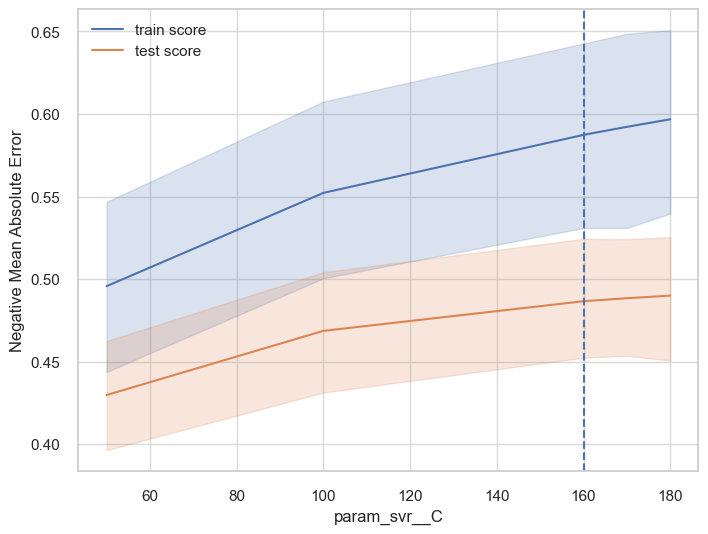

In [1745]:
display_cv_results(grid_search_svr.cv_results_, 'param_svr__C', svr_c)

In [1746]:
best_params_svr = {
    'C': 170, 
    'coef0': 1, 
    'epsilon': 15, 
    'kernel': 'poly'
}

svr_pipeline_final = Pipeline(steps=[
    ('pre_processing', log_scaled_preprocessor),
    ('svr',
     SVR(**best_params_svr))
])

fit_time_before = time.time()
svr_pipeline_final.fit(X_train, y_train)
fit_time = round((time.time() - fit_time_before), 4)
print(f'fit time: {fit_time} seconds \n')

predict_time_before = time.time()
y_pred_svr = svr_pipeline_final.predict(X_test)
predict_time = round((time.time() - predict_time_before), 4)
print(f'predict time: {predict_time} seconds \n')

display_scores(y_test, y_pred_svr, 'SVR')

fit time: 0.1434 seconds 

predict time: 0.0075 seconds 

SVR
---------------------
R2: 0.6226
MSE: 29921.36
RMSE: 172.98
MedAE: 29.9


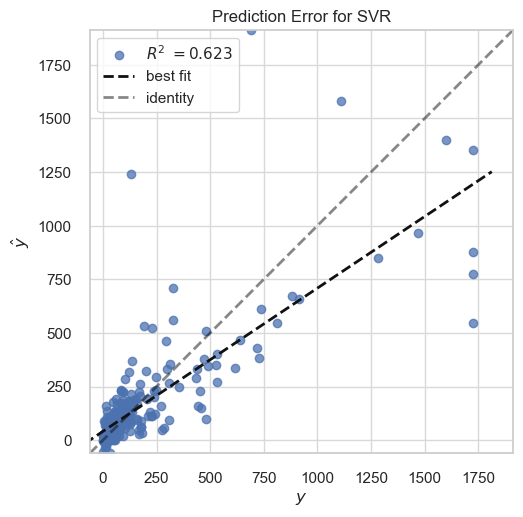

In [1747]:
visualizer_svr = prediction_error(svr_pipeline_final, X_train, y_train, X_test, y_test, is_fitted=True)

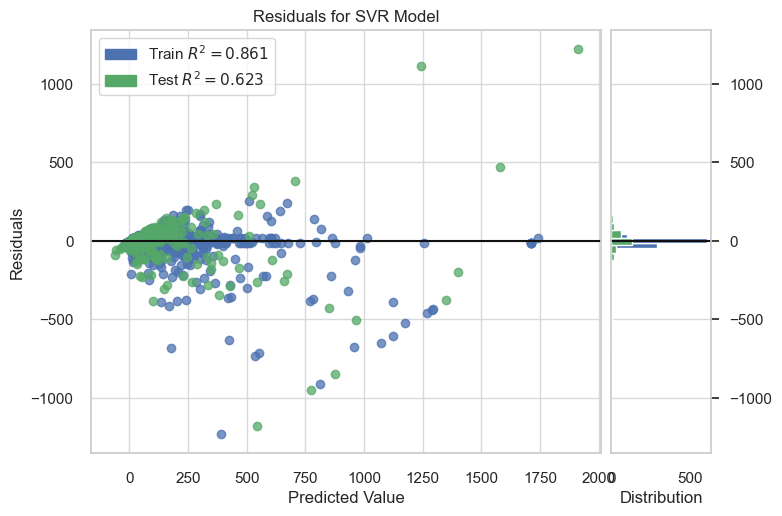

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1748]:
res_plot_svr = ResidualsPlot(svr_pipeline_final, is_fitted=True)

res_plot_svr.fit(X_train, y_train)  
res_plot_svr.score(X_test, y_test)
res_plot_svr.show() 

The SVR gave a pretty good score of 0.62 but took more time on training. <br/>
Also, if we look at the train and test score we see that the model overfits the data.

In [1749]:
errors_df.loc[len(errors_df)] = {'Model': 'SVR'} | get_errors(y_test, y_pred_svr) | {
    'fit time': fit_time,
    'predict time': predict_time
}
errors_df

Model     R2        MSE     RMSE   MedAE  fit time  \
0  Linear Regression 0.4770 41461.0700 203.6200 74.6000    0.0234   
1   Ridge Regression 0.4796 41250.0200 203.1000 69.0700    0.0201   
2              Lasso 0.4723 41833.5600 204.5300 64.9100    0.0201   
3         ElasticNet 0.4791 41294.8800 203.2100 65.5900    0.0201   
4                SVR 0.6226 29921.3600 172.9800 29.9000    0.1434   

   predict time  
0        0.0062  
1        0.0092  
2        0.0092  
3        0.0092  
4        0.0075

## Random Forest Regressor

In [1750]:
params_rfr = { 
    'rfr__n_estimators': [142, 143, 144, 145, 146],
    'rfr__max_features': ['sqrt','log2'],
    'rfr__max_depth' : [14, 15, 16],
    'rfr__random_state': [0],
}

# Estimator
rfr_pipeline = Pipeline(steps=[
    ('pre_processing', qtrans_preprocessor), 
    ('rfr', RandomForestRegressor())
])

# GridSearchCV
grid_search_rfr = GridSearchCV(estimator=rfr_pipeline,
                                 param_grid=params_rfr,
                                 scoring='r2',
                                 cv=10,
                                 return_train_score=True, n_jobs=-1, verbose=1)
print(f'start: {datetime.now()}')

grid_search_rfr.fit(X_train, y_train)

print(grid_search_rfr.best_params_, '\n')

print(f'end: {datetime.now()}')

start: 2023-07-10 11:54:30.657298
Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'rfr__max_depth': 15, 'rfr__max_features': 'sqrt', 'rfr__n_estimators': 143, 'rfr__random_state': 0} 

end: 2023-07-10 11:54:39.873601


Fine-tuning rounds:
1. {'rfr__max_depth': 9, 'rfr__max_features': 'sqrt', 'rfr__n_estimators': 100, 'rfr__random_state': 0} - 0.5709
2. {'rfr__max_depth': 11, 'rfr__max_features': 'sqrt', 'rfr__n_estimators': 150, 'rfr__random_state': 0} - 0.6025
3. {'rfr__max_depth': 13, 'rfr__max_features': 'sqrt', 'rfr__n_estimators': 150, 'rfr__random_state': 0} - 0.6139
4. **{'rfr__max_depth': 15, 'rfr__max_features': 'sqrt', 'rfr__n_estimators': 145, 'rfr__random_state': 0} - 0.6198**
5. {'rfr__max_depth': 15, 'rfr__max_features': 'sqrt', 'rfr__n_estimators': 143, 'rfr__random_state': 0} - 0.6183

   param_rfr__n_estimators  mean_train_score  mean_test_score  rank_test_score
0                      142            0.9414           0.6549               23
1                      143            0.9413           0.6548               27
2                      144            0.9414           0.6553               21
3                      145            0.9414           0.6548               25
4                      146            0.9415           0.6547               29
5                      142            0.9414           0.6549               23
6                      143            0.9413           0.6548               27
7                      144            0.9414           0.6553               21
8                      145            0.9414           0.6548               25
9                      146            0.9415           0.6547               29
10                     142            0.9441           0.6635                3
11                     143            0.9441        

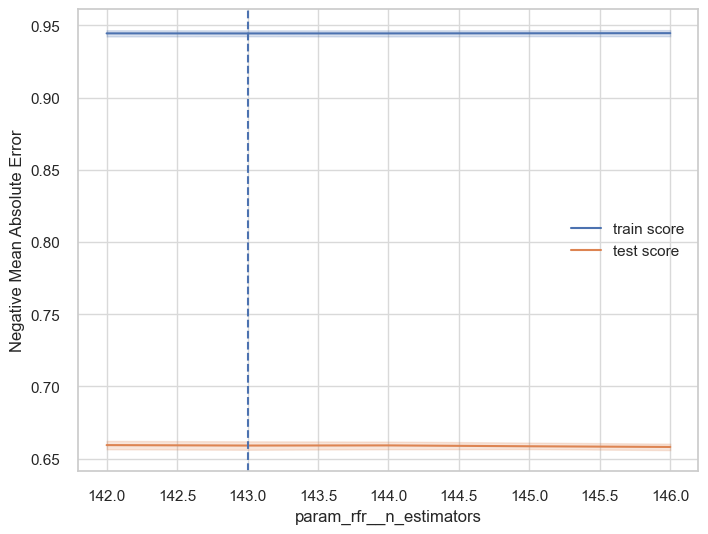

In [1751]:
n_estimators = grid_search_rfr.best_params_['rfr__n_estimators']
max_features = grid_search_rfr.best_params_['rfr__max_features']
max_depth = grid_search_rfr.best_params_['rfr__max_depth']

display_cv_results(grid_search_rfr.cv_results_, 'param_rfr__n_estimators', n_estimators)

In [1752]:
best_params_rfr = {
    'max_depth': 15,
    'max_features': 'sqrt',
    'n_estimators': 145,
    'random_state': 0
}

rfr_pipeline_final = Pipeline(steps=[(
    'pre_processing',
    qtrans_preprocessor), ('rfr', RandomForestRegressor(**best_params_rfr))])

fit_time_before = time.time()
rfr_pipeline_final.fit(X_train, y_train)
fit_time = round((time.time() - fit_time_before), 4)
print(f'fit time: {fit_time} seconds')

predict_time_before = time.time()
y_pred_rfr = rfr_pipeline_final.predict(X_test)
predict_time = round((time.time() - predict_time_before), 4)
print(f'predict time: {predict_time} seconds \n')

display_scores(y_test, y_pred_rfr, 'Random Forest Regressor')

fit time: 0.2604 seconds
predict time: 0.0135 seconds 

Random Forest Regressor
---------------------
R2: 0.6198
MSE: 30142.46
RMSE: 173.62
MedAE: 33.23


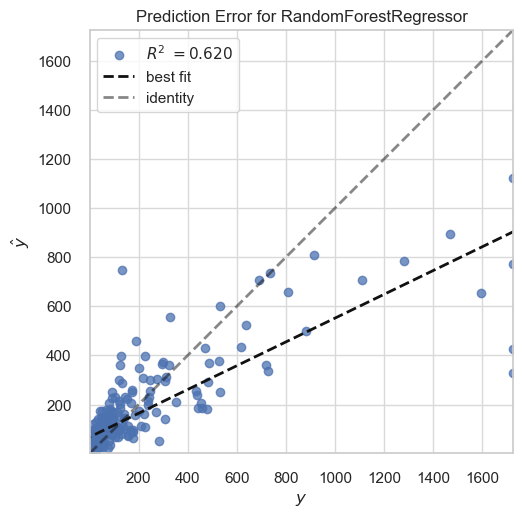

In [1753]:
visualizer_rfr = prediction_error(rfr_pipeline_final, X_train, y_train, X_test, y_test, is_fitted=True)

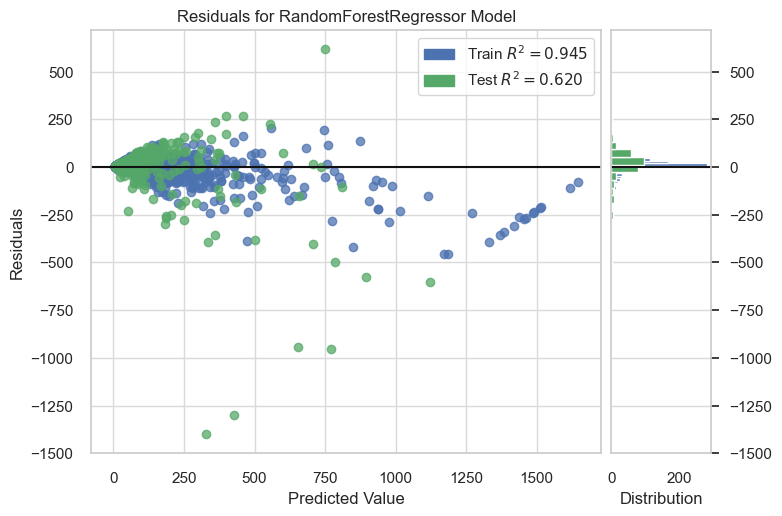

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1754]:
res_plot_rfr = ResidualsPlot(rfr_pipeline_final, is_fitted=True)

res_plot_rfr.fit(X_train, y_train)  
res_plot_rfr.score(X_test, y_test)
res_plot_rfr.show() 

The score is comparable to the SVR, slightly less though and it took more time to fit. <br/>
It also has the overfit problem, the difference between the train and test score is even bigger than for SVR.

In [1756]:
errors_df.loc[len(errors_df)] = {'Model': 'Random Forest'} | get_errors(y_test, y_pred_rfr) | {
    'fit time': fit_time,
    'predict time': predict_time
}
errors_df

Model     R2        MSE     RMSE   MedAE  fit time  \
0  Linear Regression 0.4770 41461.0700 203.6200 74.6000    0.0234   
1   Ridge Regression 0.4796 41250.0200 203.1000 69.0700    0.0201   
2              Lasso 0.4723 41833.5600 204.5300 64.9100    0.0201   
3         ElasticNet 0.4791 41294.8800 203.2100 65.5900    0.0201   
4                SVR 0.6226 29921.3600 172.9800 29.9000    0.1434   
5      Random Forest 0.6198 30142.4600 173.6200 33.2300    0.2604   

   predict time  
0        0.0062  
1        0.0092  
2        0.0092  
3        0.0092  
4        0.0075  
5        0.0135

## Gradient Boosting Regressor

In [1757]:
params_gbr = {
    'gbr__n_estimators': [10, 200, 250, 260, 270],
    'gbr__learning_rate': [0.1, 0.5, 1.0],
    'gbr__subsample': [0.6, 0.5, 0.7],
    'gbr__max_depth': [3, 4, 5],
    'gbr__random_state': [0],
}

# Estimator
gbr_pipeline = Pipeline(
    steps=[('pre_processing',
            log_scaled_preprocessor), ('gbr', GradientBoostingRegressor())])

# GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr_pipeline,
                               param_grid=params_gbr,
                               scoring='r2',
                               cv=10,
                               return_train_score=True,
                               n_jobs=-1,
                               verbose=1)
print(f'start: {datetime.now()}')

grid_search_gbr.fit(X_train, y_train)

print(grid_search_gbr.best_params_, '\n')

print(f'end: {datetime.now()}')

start: 2023-07-10 11:57:19.594684
Fitting 10 folds for each of 135 candidates, totalling 1350 fits
{'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__n_estimators': 270, 'gbr__random_state': 0, 'gbr__subsample': 0.7} 

end: 2023-07-10 11:57:56.038186


Fine-tuning rounds test results:
1. {'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__n_estimators': 200, 'gbr__random_state': 0, 'gbr__subsample': 0.5} - 0.6718 <br/>
2. **{'gbr__learning_rate': 0.1, 'gbr__max_depth': 4, 'gbr__n_estimators': 250, 'gbr__random_state': 0, 'gbr__subsample': 0.7} - 0.7047**
3. {'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__n_estimators': 260, 'gbr__random_state': 0, 'gbr__subsample': 0.7} - 0.6719
4. {'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__n_estimators': 270, 'gbr__random_state': 0, 'gbr__subsample': 0.7} - 0.6713

    param_gbr__n_estimators  mean_train_score  mean_test_score  \
0                        10            0.5990           0.4842   
1                        10            0.5922           0.4879   
2                        10            0.6076           0.4935   
3                       200            0.9594           0.7001   
4                       200            0.9543           0.7184   
..                      ...               ...              ...   
130                     260            0.9979          -0.8189   
131                     260            1.0000           0.2139   
132                     270            1.0000          -0.0594   
133                     270            0.9981          -0.8130   
134                     270            1.0000           0.2138   

     rank_test_score  
0                 90  
1                 89  
2                 88  
3                 36  
4                 13  
..               ...  
130              131  
131              101  


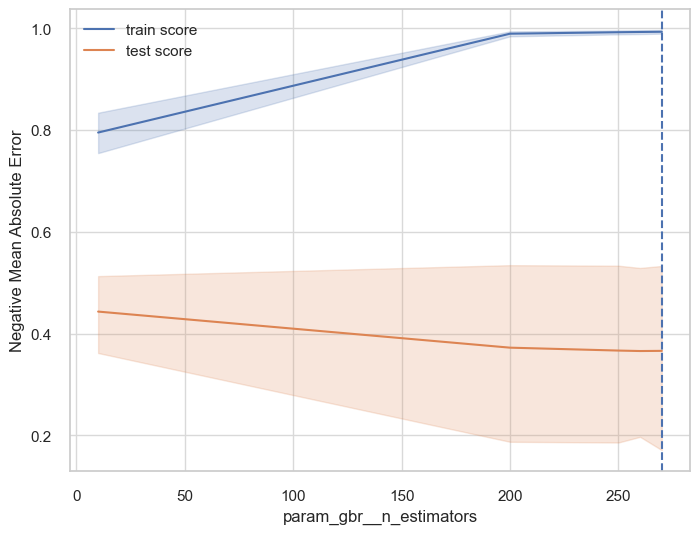

In [1758]:
n_estimators = grid_search_gbr.best_params_['gbr__n_estimators']
learning_rate = grid_search_gbr.best_params_['gbr__learning_rate']
subsample = grid_search_gbr.best_params_['gbr__subsample']
max_depth = grid_search_gbr.best_params_['gbr__max_depth']

display_cv_results(grid_search_gbr.cv_results_, 'param_gbr__n_estimators', n_estimators)

In [1759]:
best_params_gbr = {
    'learning_rate': 0.1,
    'max_depth': 4,
    'n_estimators': 250,
    'random_state': 0,
    'subsample': 0.7
}

gbr_pipeline_final = Pipeline(steps=[(
    'pre_processing',
    log_scaled_preprocessor), ('gbr',
                               GradientBoostingRegressor(**best_params_gbr))])

fit_time_before = time.time()
gbr_pipeline_final.fit(X_train, y_train)
fit_time = round((time.time() - fit_time_before), 4)
print(f'fit time: {fit_time} seconds')

predict_time_before = time.time()
y_pred_gbr = gbr_pipeline_final.predict(X_test)
predict_time = round((time.time() - predict_time_before), 4)
print(f'predict time: {predict_time} seconds \n')

display_scores(y_test, y_pred_gbr, 'Gradient Boosting Regressor')

fit time: 0.3529 seconds
predict time: 0.0039 seconds 

Gradient Boosting Regressor
---------------------
R2: 0.7047
MSE: 23411.8
RMSE: 153.01
MedAE: 26.12


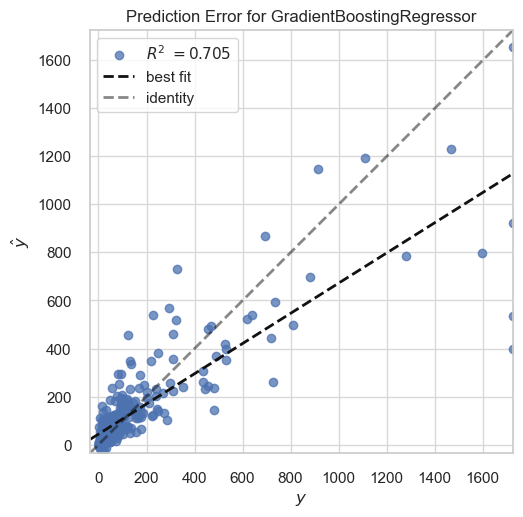

In [1760]:
visualizer_gbr = prediction_error(gbr_pipeline_final, X_train, y_train, X_test, y_test, is_fitted=True)

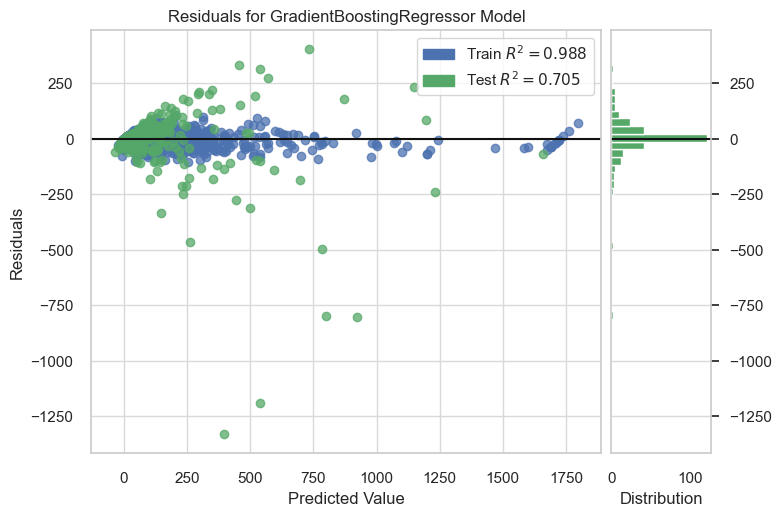

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [1761]:
res_plot_gbr = ResidualsPlot(gbr_pipeline_final, is_fitted=True)

res_plot_gbr.fit(X_train, y_train)  
res_plot_gbr.score(X_test, y_test)
res_plot_gbr.show()

The Gradient boosting gives the best score (0.705) but is rather time consuming and presents a huge overfit.

In [1762]:
errors_df.loc[len(errors_df)] = {'Model': 'Gradient boosting'} | get_errors(y_test, y_pred_gbr) | {
    'fit time': fit_time,
    'predict time': predict_time
}
errors_df

Model     R2        MSE     RMSE   MedAE  fit time  \
0  Linear Regression 0.4770 41461.0700 203.6200 74.6000    0.0234   
1   Ridge Regression 0.4796 41250.0200 203.1000 69.0700    0.0201   
2              Lasso 0.4723 41833.5600 204.5300 64.9100    0.0201   
3         ElasticNet 0.4791 41294.8800 203.2100 65.5900    0.0201   
4                SVR 0.6226 29921.3600 172.9800 29.9000    0.1434   
5      Random Forest 0.6198 30142.4600 173.6200 33.2300    0.2604   
6  Gradient boosting 0.7047 23411.8000 153.0100 26.1200    0.3529   

   predict time  
0        0.0062  
1        0.0092  
2        0.0092  
3        0.0092  
4        0.0075  
5        0.0135  
6        0.0039

# Comparing models

Visualize the scores and the errors of each model

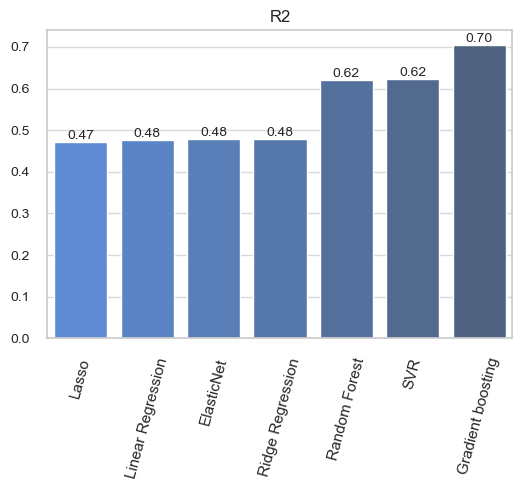

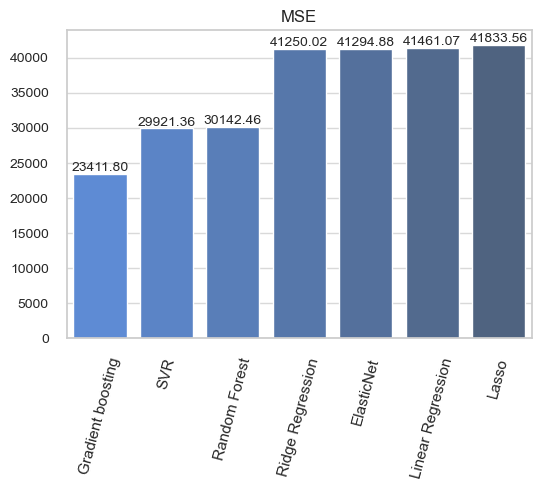

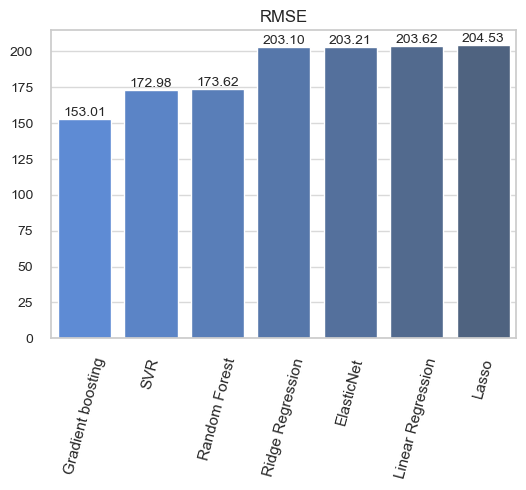

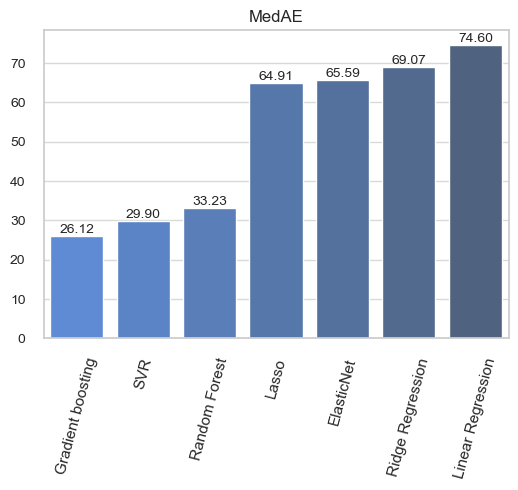

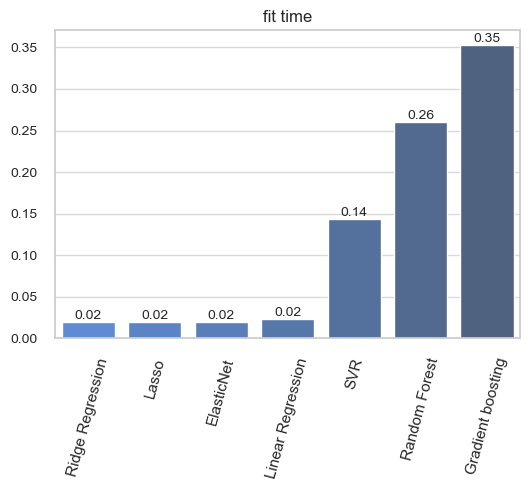

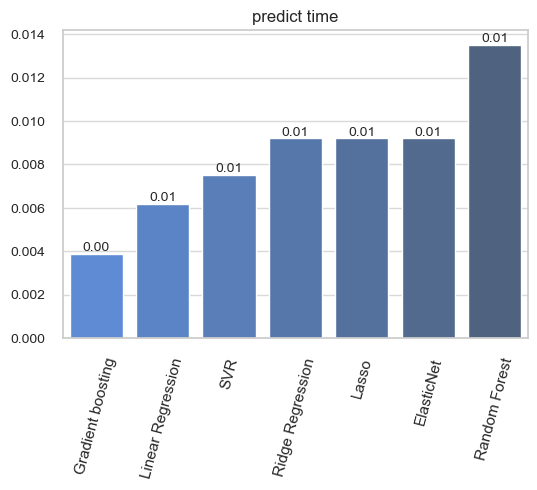

In [1763]:
metrics = errors_df.columns[1:]

for metric in metrics:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(data=errors_df.sort_values(metric),
                y=metric,
                x="Model",
                palette="blend:#4a86e8ff,#476288",
                ax=ax)
    plt.xticks(rotation=75)
    plt.yticks(fontsize=10)
    ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f')
    plt.title(metric)

    ax.set(ylabel=None)
    ax.set(xlabel=None)
    plt.show()

From the plots above we can see that Gradient Boosting, SVR and Random Forest have the best scores and the smallest errors. However, they are quite time consuming and have the tendency to overfit comparing to the linear models.
But even if the first three models are less performant than linear models, the difference in the fit time is quite small (0.3 seconds) which can be acceptable for the dataset of this size (that might get slightly bigger in the futur however as more and more buildings will be added but still be reasonable). For this reason, we'll choose the model with the best score, the Gradient Boosting Regressor.

# Feature importance

Let's see how different features affect the modelisation.

## With native methods

We can use `.coef_` method for linear models and `.feature_importances_` method for Random Forest to get the most important features.

In [1772]:
def get_feature_importance(pipeline, nb_features=20):
    '''Calculates and displays the feature importance'''

    model = pipeline.steps[1][1]
    model_name = pipeline.steps[1][0]

    feature_names = pipeline.named_steps[
        "pre_processing"].transform(X_train).columns

    feature_coefs = model.feature_importances_ if hasattr(
        model, 'feature_importances_') else model.coef_

    # Zip coefficients and names together and make a DataFrame
    zipped = zip(feature_names, feature_coefs)
    df_coefs = pd.DataFrame(zipped, columns=["feature", "value"])

    # Sort the features by the absolute value of their coefficient
    df_coefs["abs_value"] = df_coefs["value"].apply(lambda x: abs(x))
    df_coefs["colors"] = df_coefs["value"].apply(lambda x: "green"
                                                 if x > 0 else "red")
    df_coefs = df_coefs.sort_values("abs_value", ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    sns.barplot(x="value",
                y="feature",
                data=df_coefs.head(nb_features),
                palette=df_coefs.head(nb_features)["colors"])
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_title(model_name, fontsize=16)
    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.show()

FixedFormatter should only be used together with FixedLocator


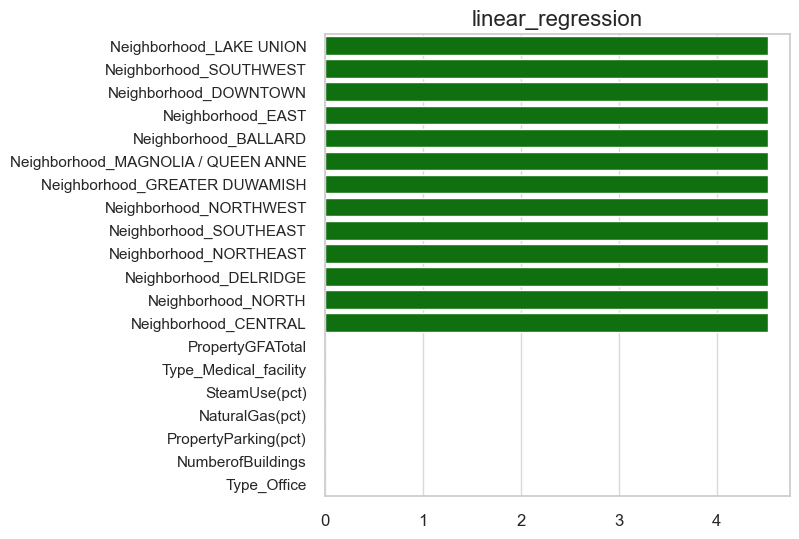

FixedFormatter should only be used together with FixedLocator


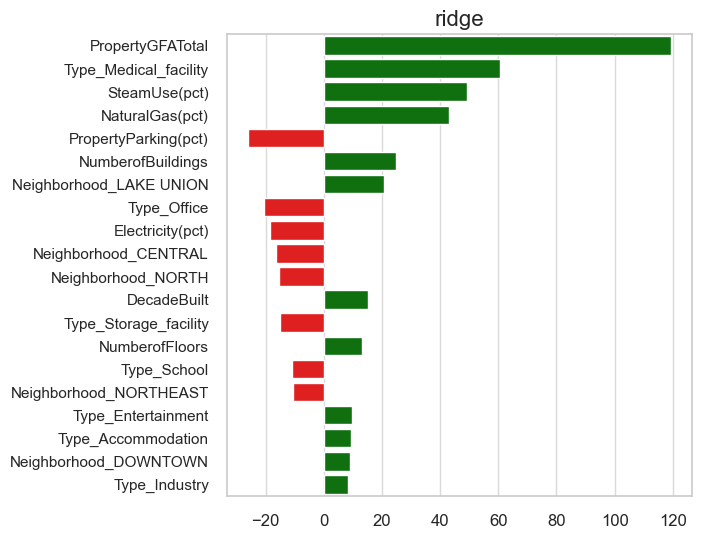

FixedFormatter should only be used together with FixedLocator


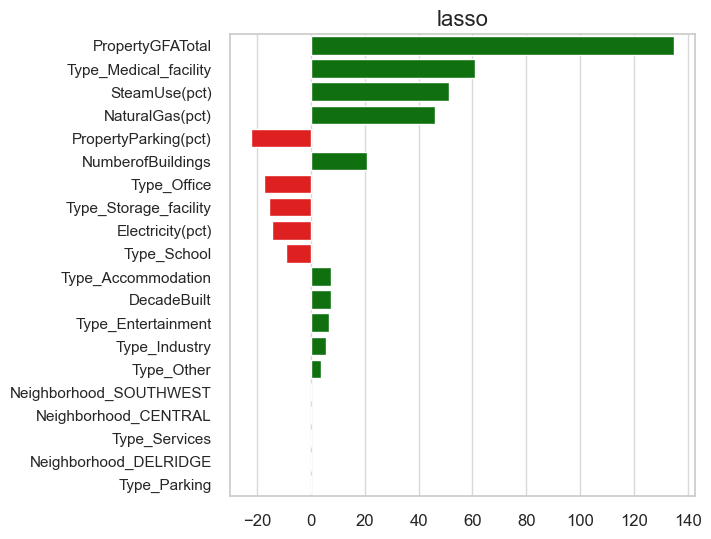

FixedFormatter should only be used together with FixedLocator


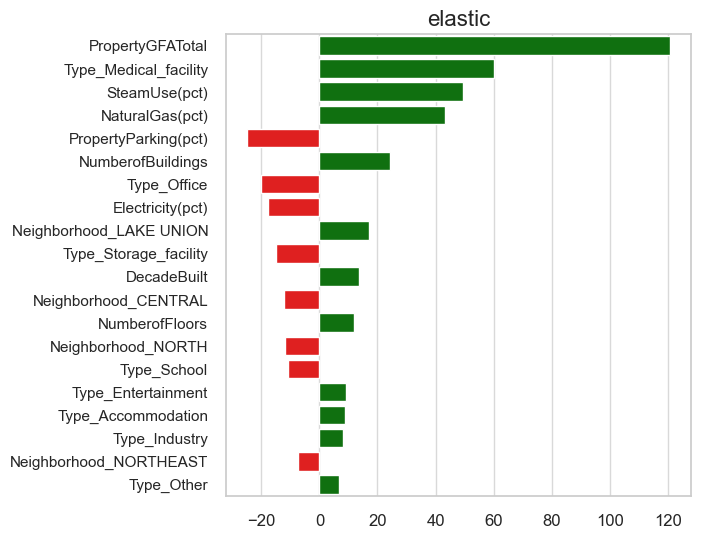

FixedFormatter should only be used together with FixedLocator


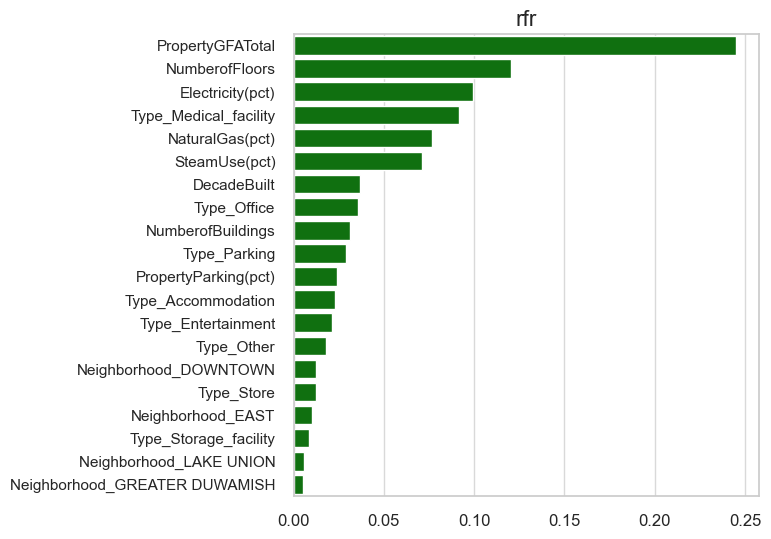

In [1773]:
models = [
    lr_pipeline_log_scaled, ridge_pipeline_final, lasso_pipeline_final,
    elastic_pipeline_final, rfr_pipeline_final
]

for model in models:
    get_feature_importance(model)

The plots above show dependencies between a specific feature and the target when all other features remain constant, for example for all models, when `PropertyGFATotal` increases, the target increases too, decrease in `PropertyParking(pct)` makes the target increase too. `Type_Medical_facility`, `NaturalGas(pct)`, `SteamUse(pct)`, `NumberofBuildings` tend to increase the target as well. We get inconsistent results for the LinearRegression where we have the one hot encoded Neighborhood feature take over other features, is it due to the one hot encoding method?

## With SHAP

In [1544]:
shap.initjs()

In [1774]:
models_to_explain = [
    lr_pipeline_log_scaled, ridge_pipeline_final, lasso_pipeline_final,
    elastic_pipeline_final, rfr_pipeline_final,
    gbr_pipeline_final
]

In [1775]:
def explain_model(model_pipeline, X_train_data, X_test_data):
    pre_processor = model_pipeline['pre_processing']
    model = model_pipeline.steps[1][1]
    
    
    X_test_processed = pre_processor.transform(X_test_data)
    X_train_processed = pre_processor.transform(X_train_data)
                
    explainer = shap.Explainer(model, X_train_processed)
    shap_values = explainer.shap_values(X_test_processed)
    
    print('Model ', model_pipeline.steps[1][0])
    
    shap.summary_plot(shap_values, X_test_processed, max_display=10)

Model  linear_regression


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


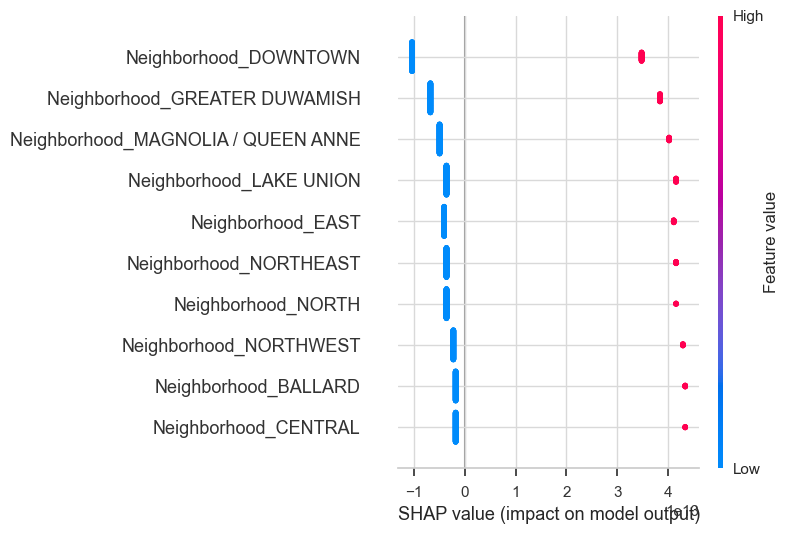

Model  ridge


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


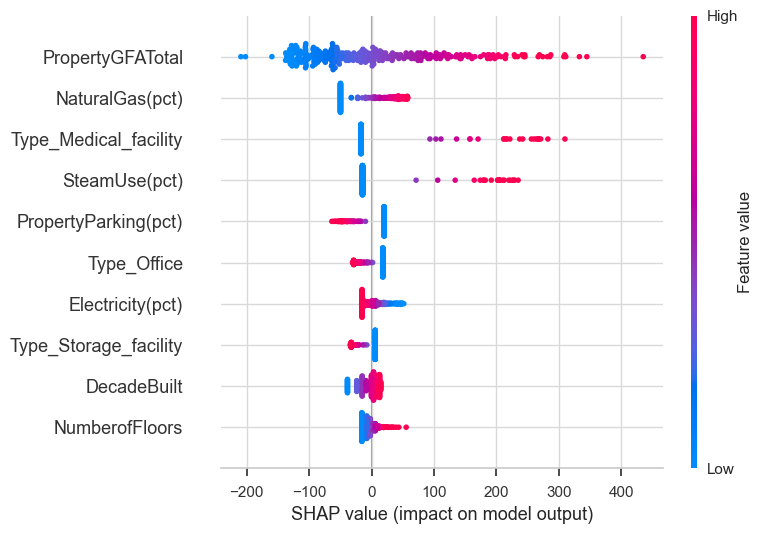

Model  lasso


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


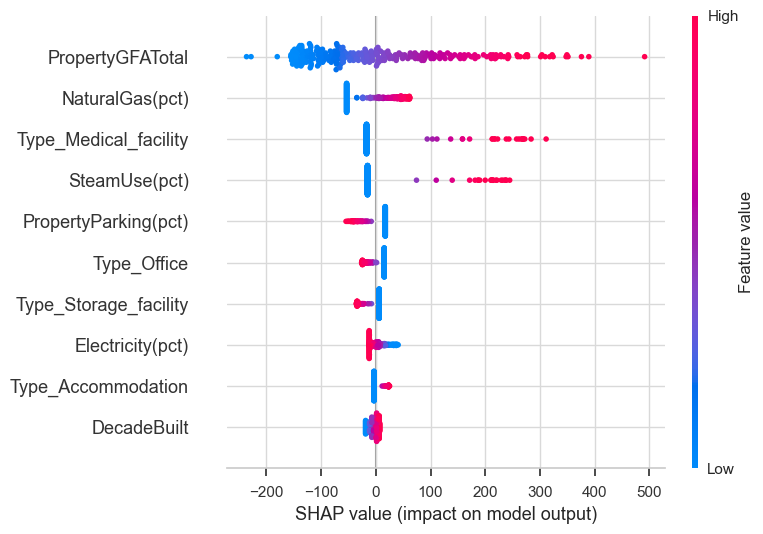

Model  elastic


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


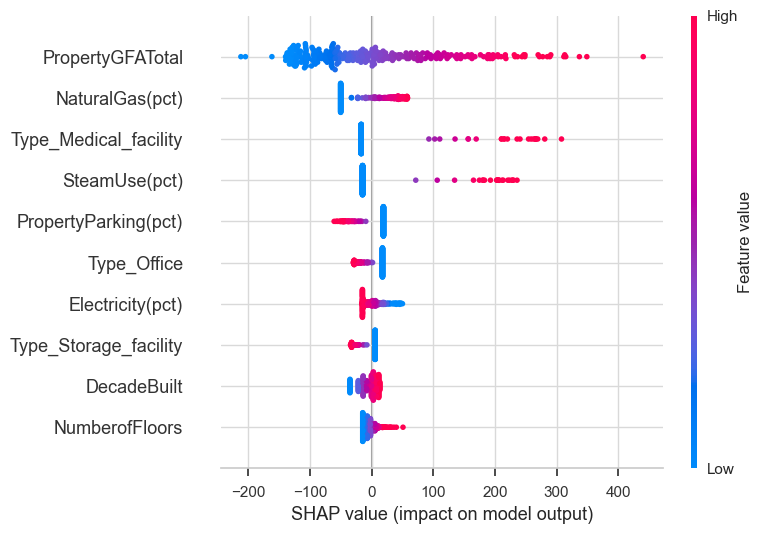

Model  rfr


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


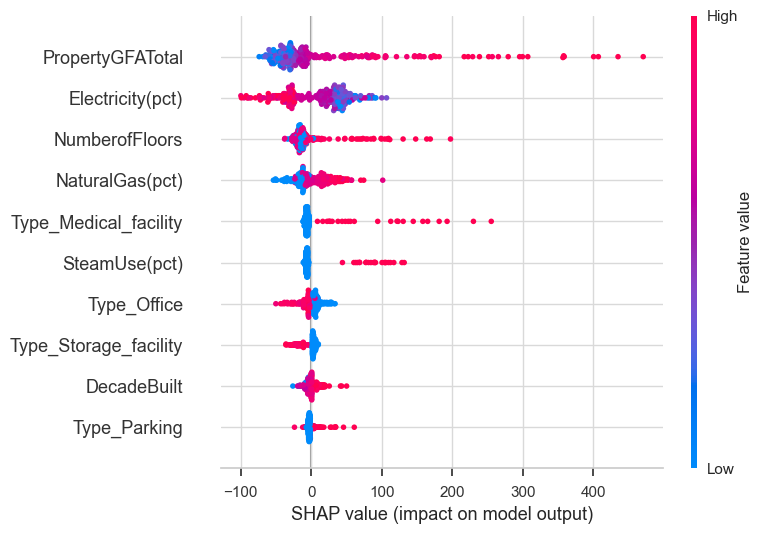

Model  gbr


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


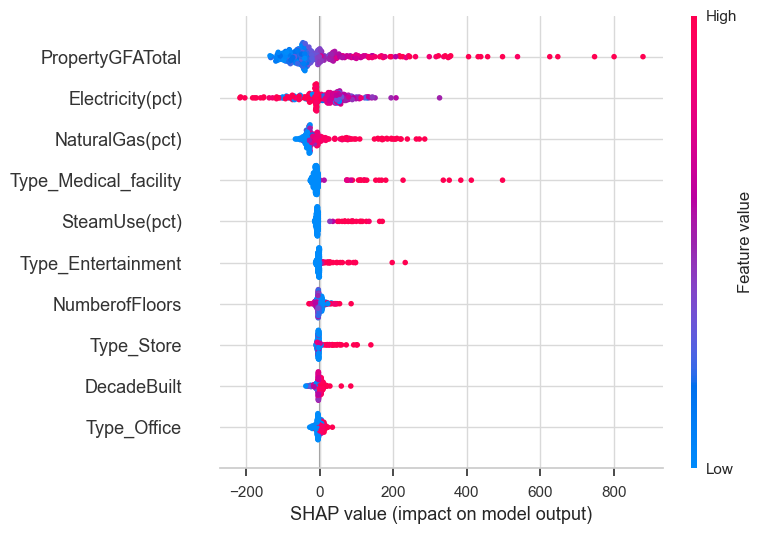

In [1776]:
for model in models_to_explain:
    explain_model(model, X_train, X_test)

In [1554]:
def explain_svr_model(model_pipeline):
    pre_processor = model_pipeline['pre_processing']
    model = model_pipeline.steps[1][1]

    X_test_processed = pre_processor.transform(X_test)
    X_train_processed = pre_processor.transform(X_train)
    X_train_processed_sample = shap.sample(X_train_processed, 100)
                
    explainer = shap.KernelExplainer(model.predict, X_train_processed_sample, random_state=0)
    shap_values = explainer.shap_values(X_test_processed)
    
    print('Model ', model_pipeline.steps[1][0])
    
    shap.summary_plot(shap_values, X_test_processed,max_display=15)

X does not have valid feature names, but SVR was fitted with feature names
  0%|          | 0/301 [00:00<?, ?it/s]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
  0%|          | 1/301 [00:03<15:38,  3.13s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
  1%|          | 2/301 [00:06<15:39,  3.14s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
  1%|          | 3/301 [00:09<15:40,  3.16s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
  1%|▏         | 4/301 [00:12<15:39,  3.16s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid f

 28%|██▊       | 83/301 [04:22<11:30,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 28%|██▊       | 84/301 [04:25<11:28,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 28%|██▊       | 85/301 [04:28<11:25,  3.18s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 29%|██▊       | 86/301 [04:31<11:20,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 29%|██▉       | 87/301 [04:34<11:19,  3.18s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 29%|██▉  

 42%|████▏     | 125/301 [06:35<09:17,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 42%|████▏     | 126/301 [06:38<09:14,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 42%|████▏     | 127/301 [06:41<09:10,  3.16s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 43%|████▎     | 128/301 [06:44<09:07,  3.16s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 43%|████▎     | 129/301 [06:47<09:04,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 43%|

 69%|██████▉   | 207/301 [10:54<04:57,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 69%|██████▉   | 208/301 [10:57<04:54,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 69%|██████▉   | 209/301 [11:00<04:52,  3.18s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 70%|██████▉   | 210/301 [11:04<04:48,  3.17s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 70%|███████   | 211/301 [11:07<04:44,  3.16s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 70%|

 96%|█████████▌| 289/301 [15:14<00:37,  3.15s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 96%|█████████▋| 290/301 [15:17<00:34,  3.15s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 97%|█████████▋| 291/301 [15:21<00:31,  3.16s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 97%|█████████▋| 292/301 [15:24<00:28,  3.18s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 97%|█████████▋| 293/301 [15:27<00:25,  3.19s/it]X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
 98%|

Model  svr


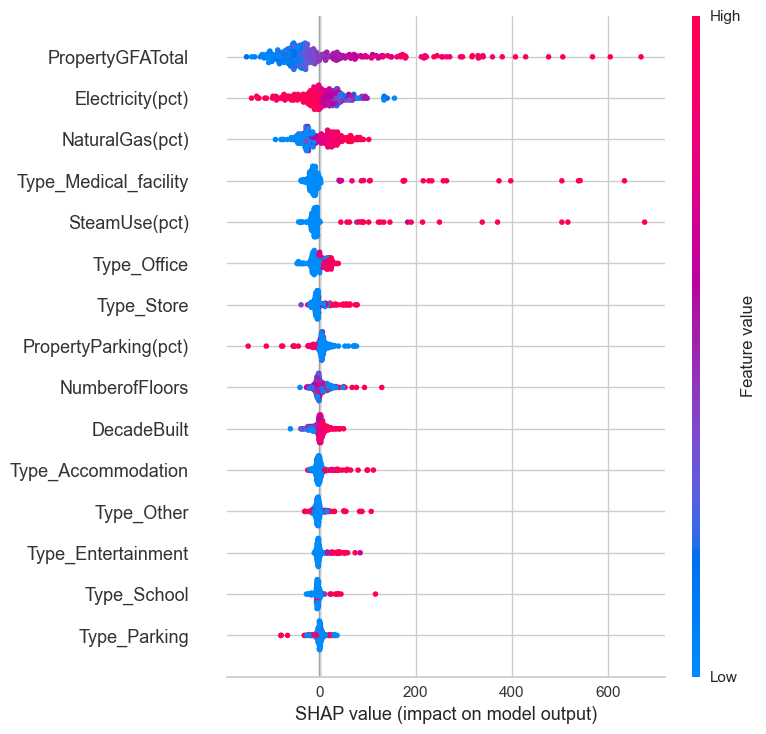

In [1555]:
explain_svr_model(svr_pipeline_final)

SHAP confirms the importance of some features detected by the 'native' models methods like `PropertyGFATotal`, `NaturalGas(pct)`, `SteamUse(pct)`, `Type_Medical_facility`, `PropertyParking(pct)`.

# EnergyStarScore

We need to decide in which extent having Energy Star Score is important for the prediction of the core emissions. <br/>
We will use a smaller dataset where the Energy Star Score is present, run the chosen model on it, check the score. Then do the same operation on the same dataset but without Energy Star Score and compare the scores and feature importances.

## Import dataset

In [1777]:
df_ess = pd.read_csv('data/cleaned/df_cleaned_with_ess.csv', dtype={"DecadeBuilt": "str"})
df_ess

Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0            DOWNTOWN             1.0000              12             88434   
1            DOWNTOWN             1.0000              11            103566   
2            DOWNTOWN             1.0000              41            956110   
3            DOWNTOWN             1.0000              10             61320   
4            DOWNTOWN             1.0000              18            175580   
..                ...                ...             ...               ...   
969        LAKE UNION             1.0000              13            536697   
970        LAKE UNION             1.0000               4            126823   
971  GREATER DUWAMISH             1.0000               1             52085   
972  GREATER DUWAMISH             1.0000               2             24990   
973  GREATER DUWAMISH             1.0000               3             45000   

     ENERGYSTARScore  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
0            60.0000           7456910.0000           249.9800   
1            61.0000           8664479.0000           295.8600   
2            43.0000          73937112.0000          2017.1706   
3            56.0000           6946800.5000           286.4300   
4            75.0000          14656503.0000           505.0100   
..               ...                    ...                ...   
969          98.0000          14037166.0000           245.1600   
970          72.0000           6042399.5000           131.0200   
971          37.0000           4182621.7500           157.7000   
972           9.0000           4731813.5000           134.8000   
973          77.0000           1397742.3750             9.2400   

     PropertyParking(pct)  SteamUse(pct)  Electricity(pct)  ...  \
0                  0.0000        27.0000           53.0000  ...   
1                 15.0000         0.0000           37.0000  ...   
2                 21.0000        12.0000           67.0000  ...   
3                  0.0000        32.0000           40.0000  ...   
4                 35.0000         0.0000           37.0000  ...   
..                    ...            ...               ...  ...   
969               37.0000         0.0000           71.0000  ...   
970               33.0000         0.0000           68.0000  ...   
971                8.0000         0.0000           18.0000  ...   
972                0.0000         0.0000           46.0000  ...   
973                0.0000         0.0000           95.0000  ...   

     Type_Entertainment Type_Industry  Type_Medical_facility  Type_Office  \
0                0.0000        0.0000                 0.0000       0.0000   
1                4.0000        0.0000                 0.0000       0.0000   
2                0.0000        0.0000                 0.0000       0.0000   
3                0.0000        0.0000                 0.0000       0.0000   
4                0.0000        0.0000                 0.0000       0.0000   
..                  ...           ...                    ...          ...   
969              0.0000        0.0000                 0.0000      64.0000   
970              0.0000        0.0000                 0.0000       0.0000   
971              0.0000        0.0000                 0.0000       0.0000   
972              0.0000        0.0000                 0.0000     100.0000   
973              0.0000        0.0000                 0.0000       0.0000   

     Type_Other  Type_Parking  Type_School  Type_Services  \
0        0.0000        0.0000       0.0000         0.0000   
1        0.0000       15.0000       0.0000         0.0000   
2        0.0000        0.0000       0.0000         0.0000   
3        0.0000        0.0000       0.0000         0.0000   
4        0.0000       39.0000       0.0000         0.0000   
..          ...           ...          ...            ...   
969      0.0000       38.0000       0.0000         0.0000   
970      0.0000       33.0000       0.0000         0.0000   


In [1778]:
df_ess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Neighborhood           974 non-null    object 
 1   NumberofBuildings      974 non-null    float64
 2   NumberofFloors         974 non-null    int64  
 3   PropertyGFATotal       974 non-null    int64  
 4   ENERGYSTARScore        974 non-null    float64
 5   SiteEnergyUseWN(kBtu)  974 non-null    float64
 6   TotalGHGEmissions      974 non-null    float64
 7   PropertyParking(pct)   974 non-null    float64
 8   SteamUse(pct)          974 non-null    float64
 9   Electricity(pct)       974 non-null    float64
 10  NaturalGas(pct)        974 non-null    float64
 11  DecadeBuilt            974 non-null    object 
 12  Type_Accommodation     974 non-null    float64
 13  Type_Entertainment     974 non-null    float64
 14  Type_Industry          974 non-null    float64
 15  Type_M

## Prepare data

In [1779]:
data_ess = df_ess.copy()

X_ess = data_ess.drop(columns=targets, axis=1)
y_ess = data_ess[main_target]

print(X_ess.shape)
print(y_ess.shape)

(974, 21)
(974,)


In [1780]:
X_ess_train, X_ess_test, y_ess_train, y_ess_test = train_test_split(
    X_ess, y_ess, test_size=0.2, random_state=42)

In [1781]:
print(X_ess_train.shape)
print(X_ess_test.shape)
print(y_ess_train.shape)
print(y_ess_test.shape)

(779, 21)
(195, 21)
(779,)
(195,)


## Train with Gradient Boosting Regressor

**Keeping EnergyStarScore**

In [1782]:
numerical_features_ess = X_ess.select_dtypes(['int64','float64']).columns
numerical_features_ess

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'PropertyParking(pct)', 'SteamUse(pct)',
       'Electricity(pct)', 'NaturalGas(pct)', 'Type_Accommodation',
       'Type_Entertainment', 'Type_Industry', 'Type_Medical_facility',
       'Type_Office', 'Type_Other', 'Type_Parking', 'Type_School',
       'Type_Services', 'Type_Storage_facility', 'Type_Store'],
      dtype='object')

In [1783]:
log_scaled_preprocessor_ess = ColumnTransformer(transformers=[
    ('ordinal_log_scale', ordinal_pipeline_log_scale, ['DecadeBuilt']),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False), ['Neighborhood']),
    ('numerical_log_scale', log_scale_pipeline, numerical_features_ess)
], verbose_feature_names_out=False,
    remainder='passthrough')

log_scaled_preprocessor_ess.set_output(transform="pandas")

With transform="pandas", `func` should return a DataFrame to follow the set_output API.


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_log_scale',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder()),
                                                 ('log_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scalar', StandardScaler())]),
                                 ['DecadeBuilt']),
                                ('one_hot_encoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Neighborhood']),
                                ('numerical_log_scale',
                                 Pipeline(steps=[(...
                                 Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'PropertyParking(pct)', 'SteamUse(pct)',
       'Electricity(pct)', 'NaturalGas(pct)', 'Type_Accommodation',
       'Type_Entertainment', 'Type_Industry', 'Type_Medical_facility',
       'Type_Office', 'Type_Other', 'Type_Parking', 'Type_School',
       'Type_Services', 'Type_Storage_facility', 'Type_Store'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [1784]:
gbr_pipeline_ess = Pipeline(steps=[(
    'pre_processing_ess',
    log_scaled_preprocessor_ess), ('gbr_ess',
                               GradientBoostingRegressor(**best_params_gbr))])

gbr_pipeline_ess.fit(X_ess_train, y_ess_train)

y_pred_gbr_ess = gbr_pipeline_ess.predict(X_ess_test)

display_scores(y_ess_test, y_pred_gbr_ess, 'Gradient Boosting Regressor')

Gradient Boosting Regressor
---------------------
R2: 0.7115
MSE: 27500.44
RMSE: 165.83
MedAE: 18.17


**Feature importance**

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


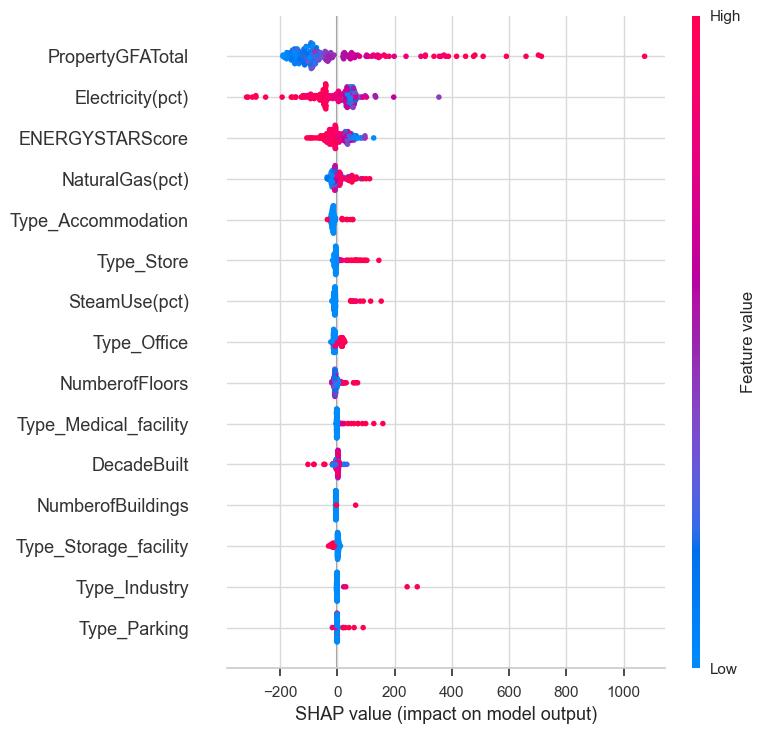

In [1785]:
X_ess_test_processed = log_scaled_preprocessor_ess.transform(X_ess_test)

explainer = shap.Explainer(gbr_pipeline_ess['gbr_ess'],
                           log_scaled_preprocessor_ess.transform(X_ess_train))
shap_values = explainer.shap_values(X_ess_test_processed,
                                    check_additivity=False)

shap.summary_plot(shap_values, X_ess_test_processed, max_display=15)

From the feature importance plot above we can observe that ENERGYSTARScore is the third important feature, higher value of the ENERGYSTARScore decreases the target value and vice versa.

**Same dataset but without EnergyStarScore**

In [1786]:
data_ess = df_ess.copy()

X_ess = data_ess.drop(columns=targets, axis=1)
X_ess = X_ess.drop(columns=['ENERGYSTARScore'], axis=1)
y_ess = data_ess[main_target]

print(X_ess.shape)
print(y_ess.shape)                               

(974, 20)
(974,)


In [1787]:
X_ess_train, X_ess_test, y_ess_train, y_ess_test = train_test_split(
    X_ess, y_ess, test_size=0.2, random_state=42)

In [1788]:
# global preprocessing pipeline can be used
gbr_pipeline_ess = Pipeline(
    steps=[('pre_processing', log_scaled_preprocessor
            ), ('gbr_ess', GradientBoostingRegressor(**best_params_gbr))])

gbr_pipeline_ess.fit(X_ess_train, y_ess_train)

y_pred_gbr_ess = gbr_pipeline_ess.predict(X_ess_test)

display_scores(y_ess_test, y_pred_gbr_ess, 'Gradient Boosting Regressor')

Gradient Boosting Regressor
---------------------
R2: 0.6961
MSE: 28972.99
RMSE: 170.21
MedAE: 17.38


We obtain a slightly lower score without Energy star score.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


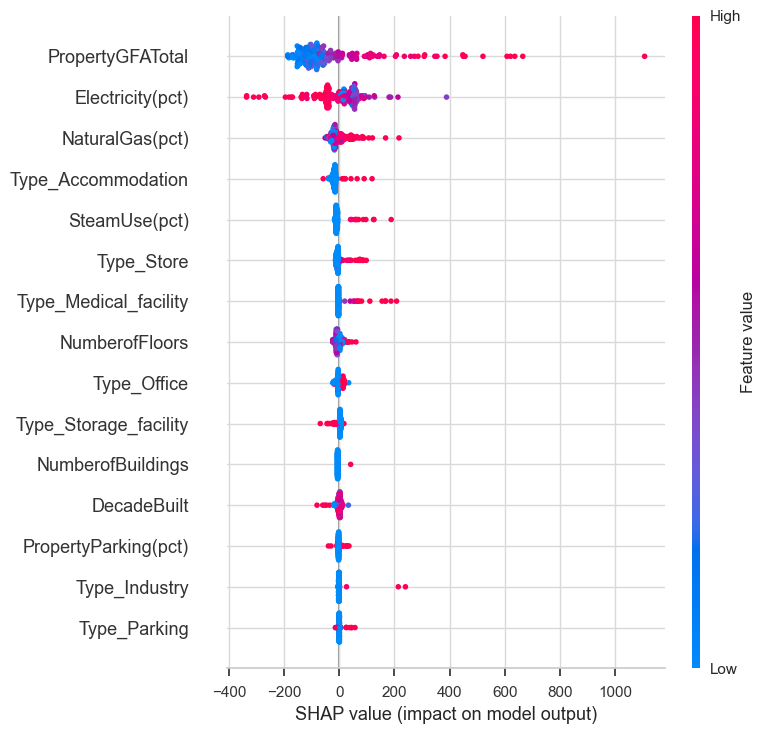

In [1789]:
X_ess_test_processed = log_scaled_preprocessor.transform(X_ess_test)

explainer = shap.Explainer(gbr_pipeline_ess['gbr_ess'],
                           log_scaled_preprocessor.transform(X_ess_train))
shap_values = explainer.shap_values(X_ess_test_processed,
                                    check_additivity=False)

shap.summary_plot(shap_values, X_ess_test_processed, max_display=15)

# Conclusion

Here is a summary of what has been done in the first target modeling (core emissions): 

1. Different preprocessing techniques have been applied to the features.
2. Linear and non-linear models have been tested.
3. Hyperparameter tuning has been performed.
4. The best model has been selected based on the score, errors and performance.
5. Feature importance has been analyzed.
6. The importance of ENERGYSTARScore feature has been studied.

Here are the results:
1. The best suited model is Gradient Boosting Regressor used with log transformed and standard scaled numeric features.
2. The 5 most important features are: `PropertyGFATotal`, `Electricity(pct)`, `NaturalGas(pct)`, `Type_Medical_facility`, `SteamUse(pct)`.
3. The ENERGYSTARScore slightly increases the r2 score.